# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [1]:
# Imports here
import os

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). You can [download the data here](https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip). The dataset is split into two parts, training and validation. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. If you use a pre-trained network, you'll also need to make sure the input data is resized to 224x224 pixels as required by the networks.

The validation set is used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks available from `torchvision` were trained on the ImageNet dataset where each color channel was normalized separately. For both sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.

In [19]:
data_dir = './flower_data/'
train_dir = data_dir + 'train/'
valid_dir = data_dir + 'valid'

In [20]:
# TODO: Define your transforms for the training and validation sets
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

# TODO: Load the datasets with ImageFolder
# image_datasets = 
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=data_transform)
# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))

# TODO: Using the image datasets and the trainforms, define the dataloaders
# define dataloader parameters
batch_size = 20
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

Num training images:  6552
Num validation images:  818


### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [46]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [47]:
print(len(cat_to_name))

102


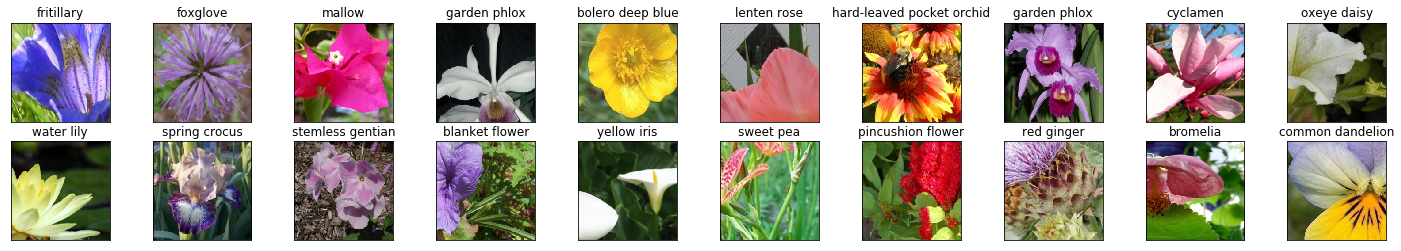

In [38]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()  # convert images to numpy for display
# print(str(labels.numpy()[0]))
# print(cat_to_name[str(labels.numpy()[0])])

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(cat_to_name[str(labels.numpy()[idx])])

# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! You can also ask questions on the forums or join the instructors in office hours.

Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

In [18]:
# TODO: Build and train your network

In [43]:
# Load the pretrained model from pytorch
# inception = models.inception_v3(pretrained=True)
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
# print(inception)
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/ajinkyapuar/.torch/models/vgg16-397923af.pth


  0%|          | 0/553433881 [00:00<?, ?it/s]

  0%|          | 114688/553433881 [00:00<08:47, 1049124.86it/s]

  0%|          | 262144/553433881 [00:00<08:05, 1138251.01it/s]

  0%|          | 393216/553433881 [00:00<07:56, 1160512.69it/s]

  0%|          | 573440/553433881 [00:00<07:14, 1272419.40it/s]

  0%|          | 737280/553433881 [00:00<06:47, 1357787.13it/s]

  0%|          | 909312/553433881 [00:00<06:23, 1440593.67it/s]

  0%|          | 1105920/553433881 [00:00<05:55, 1552630.43it/s]

  0%|          | 1286144/553433881 [00:00<05:42, 1612658.79it/s]

  0%|          | 1499136/553433881 [00:00<05:32, 1658126.16it/s]

  0%|          | 1695744/553433881 [00:01<05:19, 1729064.14it/s]

  0%|          | 1875968/553433881 [00:01<05:16, 1741641.97it/s]

  0%|          | 2105344/553433881 [00:01<04:57, 1853843.38it/s]

  0%|          | 2293760/553433881 [00:01<05:45, 1594683.06it/s]

  0%|          | 2465792/553433881 [00:01<05:53, 1560463.25it/s]

  0%|          | 2662400/553433881 [00:01<05:32, 1658050.13it/s]

  1%|          | 2891776/553433881 [00:01<05:09, 1781242.69it/s]

  1%|          | 3088384/553433881 [00:01<05:06, 1797180.36it/s]

  1%|          | 3350528/553433881 [00:01<04:39, 1969847.25it/s]

  1%|          | 3563520/553433881 [00:02<04:43, 1936340.35it/s]

  1%|          | 3776512/553433881 [00:02<04:44, 1930187.41it/s]

  1%|          | 4120576/553433881 [00:02<04:08, 2206257.78it/s]

  1%|          | 4382720/553433881 [00:02<03:58, 2302776.14it/s]

  1%|          | 4628480/553433881 [00:02<04:06, 2222697.69it/s]

  1%|          | 4866048/553433881 [00:02<04:45, 1919578.51it/s]

  1%|          | 5079040/553433881 [00:02<05:12, 1755858.42it/s]

  1%|          | 5283840/553433881 [00:02<05:03, 1803893.48it/s]

  1%|          | 5480448/553433881 [00:03<05:03, 1806692.82it/s]

  1%|          | 5709824/553433881 [00:03<04:44, 1922763.70it/s]

  1%|          | 5939200/553433881 [00:03<04:31, 2019766.75it/s]

  1%|          | 6168576/553433881 [00:03<04:24, 2067984.32it/s]

  1%|          | 6381568/553433881 [00:03<04:34, 1993782.77it/s]

  1%|          | 6594560/553433881 [00:03<04:37, 1972622.38it/s]

  1%|▏         | 6946816/553433881 [00:03<04:04, 2234664.53it/s]

  1%|▏         | 7184384/553433881 [00:03<04:03, 2246088.94it/s]

  1%|▏         | 7438336/553433881 [00:03<04:00, 2272310.39it/s]

  1%|▏         | 7675904/553433881 [00:03<03:57, 2297855.58it/s]

  1%|▏         | 7913472/553433881 [00:04<06:46, 1342827.26it/s]

  2%|▏         | 8314880/553433881 [00:04<05:36, 1619954.58it/s]

  2%|▏         | 8667136/553433881 [00:04<04:50, 1874931.50it/s]

  2%|▏         | 8912896/553433881 [00:04<04:56, 1837538.62it/s]

  2%|▏         | 9224192/553433881 [00:04<04:20, 2090574.75it/s]

  2%|▏         | 9486336/553433881 [00:04<04:08, 2190895.74it/s]

  2%|▏         | 9740288/553433881 [00:05<04:00, 2259615.17it/s]

  2%|▏         | 9994240/553433881 [00:05<04:10, 2172032.92it/s]

  2%|▏         | 10231808/553433881 [00:05<04:36, 1966638.26it/s]

  2%|▏         | 10444800/553433881 [00:05<04:56, 1830290.50it/s]

  2%|▏         | 10641408/553433881 [00:05<04:52, 1857252.21it/s]

  2%|▏         | 10936320/553433881 [00:05<04:23, 2060035.26it/s]

  2%|▏         | 11157504/553433881 [00:05<04:51, 1861645.39it/s]

  2%|▏         | 11362304/553433881 [00:05<04:58, 1814220.49it/s]

  2%|▏         | 11567104/553433881 [00:06<04:49, 1871813.74it/s]

  2%|▏         | 11763712/553433881 [00:06<05:31, 1632347.15it/s]

  2%|▏         | 12156928/553433881 [00:06<04:33, 1977679.20it/s]

  2%|▏         | 12484608/553433881 [00:06<04:01, 2240578.32it/s]

  2%|▏         | 12820480/553433881 [00:06<03:37, 2486022.20it/s]

  2%|▏         | 13107200/553433881 [00:06<03:34, 2515849.41it/s]

  2%|▏         | 13484032/553433881 [00:06<03:13, 2786641.42it/s]

  2%|▏         | 13795328/553433881 [00:06<03:19, 2708613.51it/s]

  3%|▎         | 14090240/553433881 [00:06<03:28, 2586813.07it/s]

  3%|▎         | 14368768/553433881 [00:07<03:52, 2318214.05it/s]

  3%|▎         | 14647296/553433881 [00:07<03:41, 2427027.84it/s]

  3%|▎         | 15048704/553433881 [00:07<03:16, 2746558.44it/s]

  3%|▎         | 15376384/553433881 [00:07<03:08, 2847410.64it/s]

  3%|▎         | 15753216/553433881 [00:07<02:55, 3057886.83it/s]

  3%|▎         | 16080896/553433881 [00:07<02:59, 2996734.23it/s]

  3%|▎         | 16424960/553433881 [00:07<02:53, 3088324.85it/s]

  3%|▎         | 16744448/553433881 [00:07<02:53, 3088909.65it/s]

  3%|▎         | 17088512/553433881 [00:07<02:53, 3093190.87it/s]

  3%|▎         | 17408000/553433881 [00:08<03:23, 2633827.66it/s]

  3%|▎         | 17735680/553433881 [00:08<03:13, 2771203.73it/s]

  3%|▎         | 18096128/553433881 [00:08<03:05, 2880059.14it/s]

  3%|▎         | 18456576/553433881 [00:08<02:55, 3050004.95it/s]

  3%|▎         | 18776064/553433881 [00:08<02:58, 3000482.14it/s]

  3%|▎         | 19087360/553433881 [00:08<02:57, 3006662.11it/s]

  4%|▎         | 19513344/553433881 [00:08<02:42, 3295352.26it/s]

  4%|▎         | 19857408/553433881 [00:08<02:52, 3097065.81it/s]

  4%|▎         | 20217856/553433881 [00:08<02:47, 3185675.64it/s]

  4%|▎         | 20545536/553433881 [00:09<02:49, 3152770.90it/s]

  4%|▍         | 20873216/553433881 [00:09<03:16, 2713136.76it/s]

  4%|▍         | 21159936/553433881 [00:09<03:33, 2493038.42it/s]

  4%|▍         | 21438464/553433881 [00:09<03:28, 2546297.94it/s]

  4%|▍         | 21749760/553433881 [00:09<03:17, 2687265.93it/s]

  4%|▍         | 22028288/553433881 [00:09<03:21, 2642464.61it/s]

  4%|▍         | 22306816/553433881 [00:09<03:44, 2365797.44it/s]

  4%|▍         | 22618112/553433881 [00:09<03:28, 2546668.04it/s]

  4%|▍         | 22896640/553433881 [00:10<03:27, 2560112.79it/s]

  4%|▍         | 23166976/553433881 [00:10<03:36, 2448389.34it/s]

  4%|▍         | 23420928/553433881 [00:10<04:16, 2066660.90it/s]

  4%|▍         | 23781376/553433881 [00:10<03:46, 2342021.58it/s]

  4%|▍         | 24133632/553433881 [00:10<03:24, 2585721.20it/s]

  4%|▍         | 24444928/553433881 [00:10<03:14, 2714586.46it/s]

  4%|▍         | 24739840/553433881 [00:10<03:37, 2426619.92it/s]

  5%|▍         | 25198592/553433881 [00:10<03:07, 2818389.17it/s]

  5%|▍         | 25518080/553433881 [00:10<03:03, 2873349.08it/s]

  5%|▍         | 25878528/553433881 [00:11<02:53, 3036286.31it/s]

  5%|▍         | 26206208/553433881 [00:11<02:54, 3026185.56it/s]

  5%|▍         | 26566656/553433881 [00:11<02:47, 3147473.21it/s]

  5%|▍         | 26918912/553433881 [00:11<02:42, 3249201.65it/s]

  5%|▍         | 27271168/553433881 [00:11<02:38, 3314197.67it/s]

  5%|▍         | 27615232/553433881 [00:11<02:37, 3331507.49it/s]

  5%|▌         | 27967488/553433881 [00:11<02:35, 3377007.51it/s]

  5%|▌         | 28311552/553433881 [00:11<02:36, 3356944.42it/s]

  5%|▌         | 28655616/553433881 [00:11<02:40, 3261289.33it/s]

  5%|▌         | 29024256/553433881 [00:12<02:35, 3377639.37it/s]

  5%|▌         | 29368320/553433881 [00:12<02:57, 2954265.33it/s]

  5%|▌         | 29712384/553433881 [00:12<02:50, 3063082.58it/s]

  5%|▌         | 30048256/553433881 [00:12<02:49, 3085321.81it/s]

  5%|▌         | 30367744/553433881 [00:12<02:50, 3073089.20it/s]

  6%|▌         | 30687232/553433881 [00:12<03:04, 2831958.44it/s]

  6%|▌         | 30982144/553433881 [00:12<03:29, 2495825.89it/s]

  6%|▌         | 31244288/553433881 [00:12<03:38, 2391086.63it/s]

  6%|▌         | 31604736/553433881 [00:13<03:20, 2607646.03it/s]

  6%|▌         | 31883264/553433881 [00:13<03:58, 2190584.09it/s]

  6%|▌         | 32129024/553433881 [00:13<03:53, 2230336.99it/s]

  6%|▌         | 32374784/553433881 [00:13<03:49, 2270831.15it/s]

  6%|▌         | 32612352/553433881 [00:13<05:15, 1649757.11it/s]

  6%|▌         | 32825344/553433881 [00:13<04:58, 1746267.98it/s]

  6%|▌         | 33030144/553433881 [00:13<05:13, 1661767.98it/s]

  6%|▌         | 33234944/553433881 [00:13<04:57, 1748986.73it/s]

  6%|▌         | 33505280/553433881 [00:14<04:30, 1924134.92it/s]

  6%|▌         | 33751040/553433881 [00:14<04:13, 2053632.91it/s]

  6%|▌         | 34029568/553433881 [00:14<03:56, 2193291.98it/s]

  6%|▌         | 34340864/553433881 [00:14<03:38, 2381035.99it/s]

  6%|▋         | 34635776/553433881 [00:14<03:28, 2484095.39it/s]

  6%|▋         | 34897920/553433881 [00:14<03:40, 2355335.20it/s]

  6%|▋         | 35143680/553433881 [00:14<03:54, 2212144.32it/s]

  6%|▋         | 35381248/553433881 [00:14<03:51, 2236084.94it/s]

  6%|▋         | 35618816/553433881 [00:14<03:47, 2272591.17it/s]

  6%|▋         | 35856384/553433881 [00:15<03:50, 2243472.54it/s]

  7%|▋         | 36134912/553433881 [00:15<03:37, 2381404.81it/s]

  7%|▋         | 36470784/553433881 [00:15<03:18, 2605562.61it/s]

  7%|▋         | 36782080/553433881 [00:15<03:10, 2714226.22it/s]

  7%|▋         | 37167104/553433881 [00:15<02:58, 2890779.44it/s]

  7%|▋         | 37478400/553433881 [00:15<02:56, 2928889.81it/s]

  7%|▋         | 37806080/553433881 [00:15<02:52, 2997825.78it/s]

  7%|▋         | 38150144/553433881 [00:15<02:45, 3117391.62it/s]

  7%|▋         | 38469632/553433881 [00:15<02:47, 3076983.24it/s]

  7%|▋         | 38830080/553433881 [00:16<02:44, 3119105.63it/s]

  7%|▋         | 39157760/553433881 [00:16<02:44, 3134543.27it/s]

  7%|▋         | 39526400/553433881 [00:16<02:37, 3263352.67it/s]

  7%|▋         | 39862272/553433881 [00:16<02:39, 3221931.47it/s]

  7%|▋         | 40198144/553433881 [00:16<02:37, 3251157.04it/s]

  7%|▋         | 40525824/553433881 [00:16<02:40, 3189790.50it/s]

  7%|▋         | 40853504/553433881 [00:16<02:43, 3138271.96it/s]

  7%|▋         | 41172992/553433881 [00:16<02:48, 3032767.07it/s]

  8%|▊         | 41517056/553433881 [00:16<02:45, 3099542.57it/s]

  8%|▊         | 41861120/553433881 [00:16<02:41, 3166434.73it/s]

  8%|▊         | 42180608/553433881 [00:17<02:47, 3046830.94it/s]

  8%|▊         | 42491904/553433881 [00:17<03:00, 2828606.74it/s]

  8%|▊         | 42844160/553433881 [00:17<02:50, 2994862.36it/s]

  8%|▊         | 43155456/553433881 [00:17<02:57, 2880493.55it/s]

  8%|▊         | 43450368/553433881 [00:17<03:02, 2788580.81it/s]

  8%|▊         | 43737088/553433881 [00:17<03:14, 2616548.81it/s]

  8%|▊         | 44072960/553433881 [00:17<03:02, 2786226.29it/s]

  8%|▊         | 44359680/553433881 [00:17<03:17, 2583296.56it/s]

  8%|▊         | 44630016/553433881 [00:18<03:29, 2432520.52it/s]

  8%|▊         | 44883968/553433881 [00:18<03:28, 2444558.95it/s]

  8%|▊         | 45137920/553433881 [00:18<03:28, 2442326.75it/s]

  8%|▊         | 45490176/553433881 [00:18<03:09, 2683321.59it/s]

  8%|▊         | 45768704/553433881 [00:18<03:09, 2679587.25it/s]

  8%|▊         | 46096384/553433881 [00:18<02:59, 2832344.93it/s]

  8%|▊         | 46448640/553433881 [00:18<02:49, 2992766.84it/s]

  8%|▊         | 46759936/553433881 [00:18<02:51, 2953328.70it/s]

  9%|▊         | 47063040/553433881 [00:18<03:15, 2596284.03it/s]

  9%|▊         | 47374336/553433881 [00:18<03:06, 2711365.75it/s]

  9%|▊         | 47661056/553433881 [00:19<03:07, 2700939.71it/s]

  9%|▊         | 47939584/553433881 [00:19<03:17, 2559069.78it/s]

  9%|▊         | 48283648/553433881 [00:19<03:03, 2758998.62it/s]

  9%|▉         | 48603136/553433881 [00:19<02:56, 2867107.49it/s]

  9%|▉         | 48898048/553433881 [00:19<03:15, 2574720.35it/s]

  9%|▉         | 49168384/553433881 [00:19<03:27, 2434958.36it/s]

  9%|▉         | 49422336/553433881 [00:19<03:27, 2434560.19it/s]

  9%|▉         | 49692672/553433881 [00:19<03:20, 2507767.15it/s]

  9%|▉         | 50003968/553433881 [00:20<03:16, 2563056.21it/s]

  9%|▉         | 50323456/553433881 [00:20<03:05, 2713047.09it/s]

  9%|▉         | 50601984/553433881 [00:20<03:10, 2636493.00it/s]

  9%|▉         | 50921472/553433881 [00:20<03:01, 2768147.26it/s]

  9%|▉         | 51216384/553433881 [00:20<02:58, 2811963.22it/s]

  9%|▉         | 51503104/553433881 [00:20<03:00, 2781392.66it/s]

  9%|▉         | 51789824/553433881 [00:20<03:25, 2444400.01it/s]

  9%|▉         | 52043776/553433881 [00:20<03:26, 2424282.93it/s]

  9%|▉         | 52297728/553433881 [00:20<03:40, 2271575.95it/s]

 10%|▉         | 52617216/553433881 [00:21<03:21, 2485598.94it/s]

 10%|▉         | 52879360/553433881 [00:21<03:37, 2303956.72it/s]

 10%|▉         | 53125120/553433881 [00:21<03:44, 2232142.86it/s]

 10%|▉         | 53395456/553433881 [00:21<03:34, 2327384.48it/s]

 10%|▉         | 53641216/553433881 [00:21<04:05, 2038981.92it/s]

 10%|▉         | 53862400/553433881 [00:21<04:36, 1805476.93it/s]

 10%|▉         | 54059008/553433881 [00:21<04:54, 1693979.10it/s]

 10%|▉         | 54239232/553433881 [00:21<05:17, 1571716.18it/s]

 10%|▉         | 54452224/553433881 [00:22<04:55, 1689989.89it/s]

 10%|▉         | 54648832/553433881 [00:22<04:49, 1720581.39it/s]

 10%|▉         | 54829056/553433881 [00:22<04:56, 1683738.66it/s]

 10%|▉         | 55009280/553433881 [00:22<04:59, 1665616.51it/s]

 10%|▉         | 55222272/553433881 [00:22<04:41, 1772683.37it/s]

 10%|█         | 55410688/553433881 [00:22<05:03, 1641250.15it/s]

 10%|█         | 55582720/553433881 [00:22<05:26, 1523620.82it/s]

 10%|█         | 55746560/553433881 [00:22<05:39, 1464360.13it/s]

 10%|█         | 55902208/553433881 [00:23<06:59, 1186969.69it/s]

 10%|█         | 56147968/553433881 [00:23<06:02, 1373382.54it/s]

 10%|█         | 56360960/553433881 [00:23<05:40, 1461645.70it/s]

 10%|█         | 56524800/553433881 [00:23<05:47, 1430994.89it/s]

 10%|█         | 56721408/553433881 [00:23<05:28, 1512519.05it/s]

 10%|█         | 56934400/553433881 [00:23<05:00, 1653602.29it/s]

 10%|█         | 57122816/553433881 [00:23<04:50, 1711333.60it/s]

 10%|█         | 57335808/553433881 [00:23<04:36, 1796914.46it/s]

 10%|█         | 57606144/553433881 [00:23<04:11, 1971245.20it/s]

 10%|█         | 57868288/553433881 [00:24<03:52, 2127174.04it/s]

 10%|█         | 58097664/553433881 [00:24<04:19, 1911641.84it/s]

 11%|█         | 58302464/553433881 [00:24<04:23, 1880380.43it/s]

 11%|█         | 58638336/553433881 [00:24<03:50, 2143474.17it/s]

 11%|█         | 58908672/553433881 [00:24<03:36, 2283413.55it/s]

 11%|█         | 59170816/553433881 [00:24<03:28, 2369264.29it/s]

 11%|█         | 59424768/553433881 [00:24<03:35, 2296117.86it/s]

 11%|█         | 59760640/553433881 [00:24<03:15, 2519111.40it/s]

 11%|█         | 60104704/553433881 [00:24<03:00, 2727691.07it/s]

 11%|█         | 60391424/553433881 [00:25<03:01, 2714709.36it/s]

 11%|█         | 60694528/553433881 [00:25<02:56, 2795820.33it/s]

 11%|█         | 60989440/553433881 [00:25<03:20, 2457007.53it/s]

 11%|█         | 61300736/553433881 [00:25<03:07, 2622417.04it/s]

 11%|█         | 61620224/553433881 [00:25<02:59, 2735323.28it/s]

 11%|█         | 61906944/553433881 [00:25<02:58, 2747748.89it/s]

 11%|█         | 62218240/553433881 [00:25<02:53, 2833993.00it/s]

 11%|█▏        | 62537728/553433881 [00:25<02:48, 2920823.53it/s]

 11%|█▏        | 62840832/553433881 [00:25<02:52, 2846670.41it/s]

 11%|█▏        | 63168512/553433881 [00:26<02:46, 2943346.05it/s]

 11%|█▏        | 63488000/553433881 [00:26<02:43, 3003876.21it/s]

 12%|█▏        | 63799296/553433881 [00:26<02:46, 2933357.55it/s]

 12%|█▏        | 64126976/553433881 [00:26<02:43, 2999740.92it/s]

 12%|█▏        | 64454656/553433881 [00:26<02:40, 3051739.34it/s]

 12%|█▏        | 64765952/553433881 [00:26<02:41, 3033103.55it/s]

 12%|█▏        | 65077248/553433881 [00:26<02:42, 3007660.07it/s]

 12%|█▏        | 65380352/553433881 [00:26<02:58, 2737413.46it/s]

 12%|█▏        | 65667072/553433881 [00:26<03:04, 2644880.69it/s]

 12%|█▏        | 65937408/553433881 [00:27<03:10, 2560971.89it/s]

 12%|█▏        | 66281472/553433881 [00:27<02:56, 2762134.28it/s]

 12%|█▏        | 66568192/553433881 [00:27<02:57, 2745390.17it/s]

 12%|█▏        | 66863104/553433881 [00:27<02:54, 2787086.42it/s]

 12%|█▏        | 67174400/553433881 [00:27<02:50, 2859185.00it/s]

 12%|█▏        | 67469312/553433881 [00:27<02:55, 2763647.86it/s]

 12%|█▏        | 67764224/553433881 [00:27<02:52, 2815397.26it/s]

 12%|█▏        | 68050944/553433881 [00:27<03:36, 2242392.58it/s]

 12%|█▏        | 68296704/553433881 [00:27<03:46, 2146549.67it/s]

 12%|█▏        | 68534272/553433881 [00:28<04:55, 1641192.35it/s]

 12%|█▏        | 68730880/553433881 [00:28<04:59, 1618334.94it/s]

 12%|█▏        | 68919296/553433881 [00:28<06:14, 1295347.33it/s]

 13%|█▎        | 69246976/553433881 [00:28<05:07, 1572289.43it/s]

 13%|█▎        | 69451776/553433881 [00:28<04:50, 1665945.33it/s]

 13%|█▎        | 69664768/553433881 [00:28<04:32, 1778112.40it/s]

 13%|█▎        | 69869568/553433881 [00:28<04:26, 1815996.15it/s]

 13%|█▎        | 70074368/553433881 [00:29<04:47, 1682883.60it/s]

 13%|█▎        | 70262784/553433881 [00:29<04:57, 1626459.64it/s]

 13%|█▎        | 70443008/553433881 [00:29<04:48, 1674476.52it/s]

 13%|█▎        | 70656000/553433881 [00:29<04:36, 1747338.34it/s]

 13%|█▎        | 70844416/553433881 [00:29<04:33, 1766407.56it/s]

 13%|█▎        | 71065600/553433881 [00:29<04:22, 1840073.80it/s]

 13%|█▎        | 71262208/553433881 [00:29<04:17, 1869355.37it/s]

 13%|█▎        | 71475200/553433881 [00:29<04:11, 1914510.68it/s]

 13%|█▎        | 71671808/553433881 [00:29<04:22, 1832665.45it/s]

 13%|█▎        | 71868416/553433881 [00:30<04:18, 1863753.01it/s]

 13%|█▎        | 72163328/553433881 [00:30<03:51, 2079023.75it/s]

 13%|█▎        | 72384512/553433881 [00:30<04:05, 1958738.39it/s]

 13%|█▎        | 72589312/553433881 [00:30<04:02, 1983743.59it/s]

 13%|█▎        | 72794112/553433881 [00:30<04:31, 1772923.57it/s]

 13%|█▎        | 72982528/553433881 [00:30<04:27, 1794662.90it/s]

 13%|█▎        | 73170944/553433881 [00:30<04:27, 1797908.53it/s]

 13%|█▎        | 73367552/553433881 [00:30<04:21, 1839132.72it/s]

 13%|█▎        | 73555968/553433881 [00:30<04:27, 1795608.39it/s]

 13%|█▎        | 73744384/553433881 [00:31<04:28, 1786453.44it/s]

 13%|█▎        | 73973760/553433881 [00:31<04:11, 1905522.50it/s]

 13%|█▎        | 74203136/553433881 [00:31<04:00, 1996463.72it/s]

 13%|█▎        | 74522624/553433881 [00:31<03:34, 2236980.90it/s]

 14%|█▎        | 74842112/553433881 [00:31<03:18, 2406873.74it/s]

 14%|█▎        | 75120640/553433881 [00:31<03:12, 2484293.17it/s]

 14%|█▎        | 75399168/553433881 [00:31<03:07, 2556295.36it/s]

 14%|█▎        | 75743232/553433881 [00:31<02:52, 2769381.77it/s]

 14%|█▎        | 76038144/553433881 [00:31<02:54, 2740738.53it/s]

 14%|█▍        | 76341248/553433881 [00:32<02:49, 2807016.38it/s]

 14%|█▍        | 76627968/553433881 [00:32<02:58, 2668124.76it/s]

 14%|█▍        | 76931072/553433881 [00:32<02:56, 2695824.99it/s]

 14%|█▍        | 77209600/553433881 [00:32<02:57, 2690405.55it/s]

 14%|█▍        | 77488128/553433881 [00:32<03:18, 2395515.33it/s]

 14%|█▍        | 77742080/553433881 [00:32<03:54, 2031492.36it/s]

 14%|█▍        | 77963264/553433881 [00:32<04:10, 1896025.43it/s]

 14%|█▍        | 78168064/553433881 [00:32<04:17, 1848877.53it/s]

 14%|█▍        | 78364672/553433881 [00:33<04:27, 1775954.05it/s]

 14%|█▍        | 78553088/553433881 [00:33<04:34, 1732256.11it/s]

 14%|█▍        | 78733312/553433881 [00:33<04:52, 1623503.45it/s]

 14%|█▍        | 79011840/553433881 [00:33<04:17, 1841658.92it/s]

 14%|█▍        | 79216640/553433881 [00:33<04:09, 1897439.02it/s]

 14%|█▍        | 79519744/553433881 [00:33<03:45, 2096984.72it/s]

 14%|█▍        | 79749120/553433881 [00:33<03:53, 2029353.03it/s]

 14%|█▍        | 79962112/553433881 [00:33<04:01, 1959003.34it/s]

 14%|█▍        | 80183296/553433881 [00:33<03:56, 2000758.52it/s]

 15%|█▍        | 80396288/553433881 [00:34<04:46, 1648300.03it/s]

 15%|█▍        | 80576512/553433881 [00:34<04:41, 1678560.45it/s]

 15%|█▍        | 80764928/553433881 [00:34<04:32, 1733621.47it/s]

 15%|█▍        | 80994304/553433881 [00:34<04:17, 1836287.88it/s]

 15%|█▍        | 81215488/553433881 [00:34<04:08, 1896588.92it/s]

 15%|█▍        | 81477632/553433881 [00:34<03:50, 2049986.04it/s]

 15%|█▍        | 81788928/553433881 [00:34<03:32, 2218701.81it/s]

 15%|█▍        | 82026496/553433881 [00:34<03:42, 2119191.81it/s]

 15%|█▍        | 82247680/553433881 [00:34<03:48, 2065474.15it/s]

 15%|█▍        | 82460672/553433881 [00:35<03:54, 2004245.72it/s]

 15%|█▍        | 82665472/553433881 [00:35<03:55, 2000798.93it/s]

 15%|█▍        | 82870272/553433881 [00:35<04:48, 1629276.52it/s]

 15%|█▌        | 83050496/553433881 [00:35<04:45, 1646521.89it/s]

 15%|█▌        | 83288064/553433881 [00:35<04:21, 1795214.66it/s]

 15%|█▌        | 83542016/553433881 [00:35<03:59, 1965112.49it/s]

 15%|█▌        | 83755008/553433881 [00:35<04:06, 1908888.01it/s]

 15%|█▌        | 83976192/553433881 [00:35<03:57, 1972862.21it/s]

 15%|█▌        | 84238336/553433881 [00:36<03:42, 2112473.11it/s]

 15%|█▌        | 84566016/553433881 [00:36<03:20, 2334536.51it/s]

 15%|█▌        | 84819968/553433881 [00:36<03:57, 1972133.25it/s]

 15%|█▌        | 85065728/553433881 [00:36<03:43, 2096199.14it/s]

 15%|█▌        | 85327872/553433881 [00:36<03:38, 2139851.54it/s]

 15%|█▌        | 85737472/553433881 [00:36<03:08, 2482449.83it/s]

 16%|█▌        | 86016000/553433881 [00:36<03:15, 2394578.93it/s]

 16%|█▌        | 86294528/553433881 [00:36<03:07, 2495171.81it/s]

 16%|█▌        | 86614016/553433881 [00:36<02:56, 2644924.54it/s]

 16%|█▌        | 87031808/553433881 [00:37<02:37, 2958205.30it/s]

 16%|█▌        | 87367680/553433881 [00:37<02:32, 3052590.22it/s]

 16%|█▌        | 87711744/553433881 [00:37<02:27, 3157299.26it/s]

 16%|█▌        | 88080384/553433881 [00:37<02:24, 3222385.99it/s]

 16%|█▌        | 88416256/553433881 [00:37<02:22, 3260085.98it/s]

 16%|█▌        | 88752128/553433881 [00:37<02:36, 2967040.99it/s]

 16%|█▌        | 89145344/553433881 [00:37<02:26, 3177103.47it/s]

 16%|█▌        | 89481216/553433881 [00:37<02:55, 2641159.63it/s]

 16%|█▌        | 89776128/553433881 [00:38<03:24, 2265877.65it/s]

 16%|█▋        | 90030080/553433881 [00:38<03:20, 2311493.38it/s]

 16%|█▋        | 90292224/553433881 [00:38<03:16, 2355992.27it/s]

 16%|█▋        | 90546176/553433881 [00:38<03:12, 2407840.03it/s]

 16%|█▋        | 90955776/553433881 [00:38<02:48, 2744325.00it/s]

 16%|█▋        | 91258880/553433881 [00:38<03:23, 2272862.95it/s]

 17%|█▋        | 91521024/553433881 [00:38<03:17, 2334580.85it/s]

 17%|█▋        | 91783168/553433881 [00:38<03:14, 2378093.06it/s]

 17%|█▋        | 92127232/553433881 [00:38<02:58, 2579187.52it/s]

 17%|█▋        | 92405760/553433881 [00:39<03:17, 2339632.06it/s]

 17%|█▋        | 92659712/553433881 [00:39<03:41, 2076866.87it/s]

 17%|█▋        | 92889088/553433881 [00:39<03:51, 1990732.16it/s]

 17%|█▋        | 93102080/553433881 [00:39<03:53, 1973658.99it/s]

 17%|█▋        | 93413376/553433881 [00:39<03:29, 2199490.89it/s]

 17%|█▋        | 93650944/553433881 [00:39<03:29, 2190998.28it/s]

 17%|█▋        | 93970432/553433881 [00:39<03:11, 2404677.93it/s]

 17%|█▋        | 94281728/553433881 [00:39<02:59, 2559994.28it/s]

 17%|█▋        | 94625792/553433881 [00:40<02:45, 2771435.68it/s]

 17%|█▋        | 95019008/553433881 [00:40<02:31, 3032591.85it/s]

 17%|█▋        | 95363072/553433881 [00:40<02:25, 3143703.14it/s]

 17%|█▋        | 95715328/553433881 [00:40<02:21, 3245322.97it/s]

 17%|█▋        | 96100352/553433881 [00:40<02:14, 3399428.91it/s]

 17%|█▋        | 96452608/553433881 [00:40<02:15, 3375983.05it/s]

 17%|█▋        | 96829440/553433881 [00:40<02:12, 3455390.13it/s]

 18%|█▊        | 97198080/553433881 [00:40<02:09, 3517039.46it/s]

 18%|█▊        | 97558528/553433881 [00:40<02:12, 3433794.26it/s]

 18%|█▊        | 97935360/553433881 [00:40<02:10, 3493483.51it/s]

 18%|█▊        | 98320384/553433881 [00:41<02:06, 3590746.41it/s]

 18%|█▊        | 98713600/553433881 [00:41<02:03, 3668677.00it/s]

 18%|█▊        | 99090432/553433881 [00:41<02:05, 3614667.03it/s]

 18%|█▊        | 99491840/553433881 [00:41<02:01, 3721876.27it/s]

 18%|█▊        | 99926016/553433881 [00:41<01:56, 3884364.45it/s]

 18%|█▊        | 100319232/553433881 [00:41<02:01, 3721496.12it/s]

 18%|█▊        | 100737024/553433881 [00:41<02:00, 3746671.44it/s]

 18%|█▊        | 101122048/553433881 [00:41<02:06, 3585599.79it/s]

 18%|█▊        | 101564416/553433881 [00:41<01:59, 3794022.96it/s]

 18%|█▊        | 101949440/553433881 [00:42<01:58, 3803013.62it/s]

 18%|█▊        | 102334464/553433881 [00:42<02:00, 3732372.12it/s]

 19%|█▊        | 102719488/553433881 [00:42<02:00, 3734459.02it/s]

 19%|█▊        | 103096320/553433881 [00:42<02:03, 3654055.72it/s]

 19%|█▊        | 103464960/553433881 [00:42<02:11, 3422739.82it/s]

 19%|█▉        | 103890944/553433881 [00:42<02:04, 3619397.19it/s]

 19%|█▉        | 104259584/553433881 [00:42<02:19, 3229087.83it/s]

 19%|█▉        | 104595456/553433881 [00:42<02:44, 2732522.33it/s]

 19%|█▉        | 104890368/553433881 [00:42<02:47, 2675995.87it/s]

 19%|█▉        | 105177088/553433881 [00:43<02:56, 2542828.80it/s]

 19%|█▉        | 105447424/553433881 [00:43<02:59, 2498711.05it/s]

 19%|█▉        | 105709568/553433881 [00:43<02:57, 2528957.26it/s]

 19%|█▉        | 105971712/553433881 [00:43<03:21, 2217692.07it/s]

 19%|█▉        | 106332160/553433881 [00:43<03:00, 2479143.48it/s]

 19%|█▉        | 106602496/553433881 [00:43<03:10, 2343577.09it/s]

 19%|█▉        | 106856448/553433881 [00:43<03:25, 2178406.32it/s]

 19%|█▉        | 107094016/553433881 [00:43<03:38, 2038772.12it/s]

 19%|█▉        | 107339776/553433881 [00:44<03:28, 2143097.39it/s]

 19%|█▉        | 107585536/553433881 [00:44<03:29, 2133153.80it/s]

 19%|█▉        | 107806720/553433881 [00:44<04:03, 1829817.84it/s]

 20%|█▉        | 108199936/553433881 [00:44<03:28, 2140470.73it/s]

 20%|█▉        | 108445696/553433881 [00:44<03:38, 2039359.96it/s]

 20%|█▉        | 108691456/553433881 [00:44<03:32, 2097526.27it/s]

 20%|█▉        | 108953600/553433881 [00:44<03:19, 2231138.65it/s]

 20%|█▉        | 109191168/553433881 [00:44<03:19, 2223005.72it/s]

 20%|█▉        | 109428736/553433881 [00:45<03:19, 2228698.66it/s]

 20%|█▉        | 109658112/553433881 [00:45<03:17, 2247007.82it/s]

 20%|█▉        | 109887488/553433881 [00:45<03:20, 2213690.94it/s]

 20%|█▉        | 110141440/553433881 [00:45<03:14, 2280225.37it/s]

 20%|█▉        | 110387200/553433881 [00:45<03:17, 2241582.50it/s]

 20%|██        | 110698496/553433881 [00:45<03:01, 2435282.17it/s]

 20%|██        | 111050752/553433881 [00:45<02:46, 2661448.26it/s]

 20%|██        | 111427584/553433881 [00:45<02:32, 2889112.36it/s]

 20%|██        | 111755264/553433881 [00:45<02:28, 2979092.10it/s]

 20%|██        | 112107520/553433881 [00:45<02:22, 3089356.73it/s]

 20%|██        | 112427008/553433881 [00:46<02:22, 3099982.41it/s]

 20%|██        | 112803840/553433881 [00:46<02:18, 3174065.46it/s]

 20%|██        | 113131520/553433881 [00:46<04:16, 1718958.49it/s]

 21%|██        | 114499584/553433881 [00:46<03:09, 2318180.19it/s]

 21%|██        | 115048448/553433881 [00:46<02:43, 2676224.92it/s]

 21%|██        | 115564544/553433881 [00:46<02:30, 2901328.39it/s]

 21%|██        | 116031488/553433881 [00:47<02:34, 2831486.86it/s]

 21%|██        | 116441088/553433881 [00:47<02:25, 2996552.67it/s]

 21%|██        | 116834304/553433881 [00:47<02:22, 3071928.60it/s]

 21%|██        | 117309440/553433881 [00:47<02:08, 3400214.33it/s]

 21%|██▏       | 117710848/553433881 [00:47<02:04, 3505480.53it/s]

 21%|██▏       | 118104064/553433881 [00:47<02:05, 3465631.78it/s]

 21%|██▏       | 118480896/553433881 [00:47<02:02, 3547295.60it/s]

 21%|██▏       | 118857728/553433881 [00:47<02:05, 3469938.14it/s]

 22%|██▏       | 119226368/553433881 [00:48<02:24, 3007575.86it/s]

 22%|██▏       | 119554048/553433881 [00:48<05:33, 1300496.62it/s]

 22%|██▏       | 120832000/553433881 [00:48<04:03, 1779080.04it/s]

 22%|██▏       | 121380864/553433881 [00:48<03:21, 2149346.21it/s]

 22%|██▏       | 121896960/553433881 [00:49<03:00, 2390736.20it/s]

 22%|██▏       | 122355712/553433881 [00:49<02:59, 2401012.10it/s]

 22%|██▏       | 122748928/553433881 [00:49<02:46, 2587051.43it/s]

 22%|██▏       | 123117568/553433881 [00:49<02:34, 2788970.01it/s]

 22%|██▏       | 123518976/553433881 [00:49<02:20, 3062073.85it/s]

 22%|██▏       | 123904000/553433881 [00:49<02:12, 3241241.88it/s]

 22%|██▏       | 124280832/553433881 [00:49<02:07, 3354357.39it/s]

 23%|██▎       | 124682240/553433881 [00:49<02:05, 3410572.08it/s]

 23%|██▎       | 125059072/553433881 [00:49<02:02, 3498081.21it/s]

 23%|██▎       | 125427712/553433881 [00:50<02:03, 3456787.00it/s]

 23%|██▎       | 125788160/553433881 [00:50<02:33, 2778529.82it/s]

 23%|██▎       | 126394368/553433881 [00:50<02:08, 3317002.04it/s]

 23%|██▎       | 126812160/553433881 [00:50<02:01, 3521638.64it/s]

 23%|██▎       | 127221760/553433881 [00:50<02:30, 2838106.04it/s]

 23%|██▎       | 127729664/553433881 [00:50<02:10, 3266060.85it/s]

 23%|██▎       | 128196608/553433881 [00:50<01:58, 3578253.30it/s]

 23%|██▎       | 128614400/553433881 [00:51<02:02, 3469847.92it/s]

 23%|██▎       | 128999424/553433881 [00:51<02:02, 3470605.56it/s]

 23%|██▎       | 129376256/553433881 [00:51<02:04, 3408968.90it/s]

 23%|██▎       | 129736704/553433881 [00:51<02:08, 3287219.72it/s]

 24%|██▎       | 130146304/553433881 [00:51<02:01, 3474464.72it/s]

 24%|██▎       | 130539520/553433881 [00:51<01:58, 3565685.93it/s]

 24%|██▎       | 130916352/553433881 [00:51<01:57, 3599010.39it/s]

 24%|██▎       | 131284992/553433881 [00:51<01:57, 3585297.67it/s]

 24%|██▍       | 131653632/553433881 [00:51<01:57, 3595399.56it/s]

 24%|██▍       | 132022272/553433881 [00:51<02:00, 3508450.63it/s]

 24%|██▍       | 132431872/553433881 [00:52<01:55, 3638628.89it/s]

 24%|██▍       | 132800512/553433881 [00:52<02:43, 2570476.07it/s]

 24%|██▍       | 133652480/553433881 [00:52<02:09, 3244978.07it/s]

 24%|██▍       | 134119424/553433881 [00:52<02:02, 3427217.64it/s]

 24%|██▍       | 134569984/553433881 [00:52<02:18, 3016479.99it/s]

 24%|██▍       | 134955008/553433881 [00:52<02:27, 2844229.20it/s]

 24%|██▍       | 135421952/553433881 [00:53<02:09, 3220238.56it/s]

 25%|██▍       | 135806976/553433881 [00:53<02:04, 3341575.85it/s]

 25%|██▍       | 136208384/553433881 [00:53<01:59, 3504481.49it/s]

 25%|██▍       | 136601600/553433881 [00:53<01:56, 3575627.61it/s]

 25%|██▍       | 136994816/553433881 [00:53<01:58, 3505635.17it/s]

 25%|██▍       | 137396224/553433881 [00:53<01:55, 3596574.36it/s]

 25%|██▍       | 137773056/553433881 [00:53<01:57, 3522911.69it/s]

 25%|██▍       | 138141696/553433881 [00:53<01:57, 3539102.66it/s]

 25%|██▌       | 138502144/553433881 [00:53<01:58, 3494790.89it/s]

 25%|██▌       | 138870784/553433881 [00:53<01:56, 3543832.55it/s]

 25%|██▌       | 139231232/553433881 [00:54<01:59, 3474275.90it/s]

 25%|██▌       | 139583488/553433881 [00:54<01:59, 3448902.94it/s]

 25%|██▌       | 139935744/553433881 [00:54<02:02, 3383115.23it/s]

 25%|██▌       | 140345344/553433881 [00:54<01:56, 3541353.29it/s]

 25%|██▌       | 140722176/553433881 [00:54<01:57, 3509541.45it/s]

 25%|██▌       | 141082624/553433881 [00:54<02:35, 2653279.57it/s]

 26%|██▌       | 141582336/553433881 [00:54<02:13, 3081571.11it/s]

 26%|██▌       | 141942784/553433881 [00:54<02:21, 2910696.88it/s]

 26%|██▌       | 142270464/553433881 [00:55<02:34, 2653143.28it/s]

 26%|██▌       | 142573568/553433881 [00:55<02:40, 2566540.46it/s]

 26%|██▌       | 142852096/553433881 [00:55<02:40, 2558891.00it/s]

 26%|██▌       | 143130624/553433881 [00:55<02:42, 2517638.88it/s]

 26%|██▌       | 143400960/553433881 [00:55<02:58, 2300959.61it/s]

 26%|██▌       | 143704064/553433881 [00:55<02:45, 2476870.78it/s]

 26%|██▌       | 143966208/553433881 [00:55<02:46, 2464178.70it/s]

 26%|██▌       | 144228352/553433881 [00:55<02:57, 2309198.31it/s]

 26%|██▌       | 144474112/553433881 [00:56<03:51, 1763272.46it/s]

 26%|██▌       | 144678912/553433881 [00:56<03:47, 1794237.46it/s]

 26%|██▌       | 144891904/553433881 [00:56<03:40, 1856180.55it/s]

 26%|██▌       | 145096704/553433881 [00:56<03:39, 1857939.91it/s]

 26%|██▋       | 145358848/553433881 [00:56<03:21, 2023638.86it/s]

 26%|██▋       | 145588224/553433881 [00:56<03:17, 2069895.27it/s]

 26%|██▋       | 145899520/553433881 [00:56<02:58, 2277388.52it/s]

 26%|██▋       | 146145280/553433881 [00:56<03:15, 2085125.49it/s]

 26%|██▋       | 146407424/553433881 [00:57<03:05, 2196421.91it/s]

 27%|██▋       | 146669568/553433881 [00:57<02:58, 2277242.79it/s]

 27%|██▋       | 147161088/553433881 [00:57<02:32, 2663443.42it/s]

 27%|██▋       | 147488768/553433881 [00:57<02:25, 2784428.34it/s]

 27%|██▋       | 147808256/553433881 [00:57<02:21, 2866125.31it/s]

 27%|██▋       | 148144128/553433881 [00:57<02:15, 2994177.22it/s]

 27%|██▋       | 148463616/553433881 [00:57<02:56, 2298804.38it/s]

 27%|██▋       | 149053440/553433881 [00:57<02:24, 2802466.72it/s]

 27%|██▋       | 149413888/553433881 [00:58<02:30, 2676684.07it/s]

 27%|██▋       | 149741568/553433881 [00:58<02:53, 2320752.65it/s]

 27%|██▋       | 150028288/553433881 [00:58<03:11, 2109654.13it/s]

 27%|██▋       | 150282240/553433881 [00:58<03:22, 1993813.83it/s]

 27%|██▋       | 150511616/553433881 [00:58<03:46, 1779347.76it/s]

 27%|██▋       | 150716416/553433881 [00:58<03:53, 1725380.02it/s]

 27%|██▋       | 150913024/553433881 [00:58<04:00, 1675382.06it/s]

 27%|██▋       | 151093248/553433881 [00:59<04:36, 1455504.76it/s]

 27%|██▋       | 151257088/553433881 [00:59<04:29, 1490100.90it/s]

 27%|██▋       | 151592960/553433881 [00:59<03:50, 1745823.86it/s]

 27%|██▋       | 151945216/553433881 [00:59<03:16, 2045938.24it/s]

 28%|██▊       | 152272896/553433881 [00:59<02:54, 2292512.49it/s]

 28%|██▊       | 152641536/553433881 [00:59<02:35, 2579605.26it/s]

 28%|██▊       | 152952832/553433881 [00:59<02:27, 2716413.85it/s]

 28%|██▊       | 153280512/553433881 [00:59<02:20, 2855985.69it/s]

 28%|██▊       | 153608192/553433881 [00:59<02:15, 2948376.06it/s]

 28%|██▊       | 154025984/553433881 [01:00<02:04, 3211541.28it/s]

 28%|██▊       | 154386432/553433881 [01:00<02:00, 3315432.23it/s]

 28%|██▊       | 154738688/553433881 [01:00<02:16, 2926273.61it/s]

 28%|██▊       | 155082752/553433881 [01:00<02:10, 3057419.38it/s]

 28%|██▊       | 155426816/553433881 [01:00<02:06, 3145363.12it/s]

 28%|██▊       | 155762688/553433881 [01:00<02:04, 3188343.02it/s]

 28%|██▊       | 156090368/553433881 [01:00<02:04, 3194071.50it/s]

 28%|██▊       | 156418048/553433881 [01:00<02:05, 3164854.65it/s]

 28%|██▊       | 156778496/553433881 [01:00<02:02, 3242744.54it/s]

 28%|██▊       | 157138944/553433881 [01:00<01:59, 3330134.12it/s]

 28%|██▊       | 157491200/553433881 [01:01<02:00, 3284300.21it/s]

 29%|██▊       | 157827072/553433881 [01:01<02:30, 2636670.58it/s]

 29%|██▊       | 158367744/553433881 [01:01<02:08, 3072737.20it/s]

 29%|██▊       | 158720000/553433881 [01:01<02:10, 3024653.77it/s]

 29%|██▊       | 159055872/553433881 [01:01<02:18, 2851438.17it/s]

 29%|██▉       | 159449088/553433881 [01:01<02:07, 3099663.45it/s]

 29%|██▉       | 159784960/553433881 [01:01<02:05, 3146519.29it/s]

 29%|██▉       | 160161792/553433881 [01:01<01:59, 3289920.54it/s]

 29%|██▉       | 160563200/553433881 [01:02<01:53, 3472538.96it/s]

 29%|██▉       | 160940032/553433881 [01:02<01:50, 3546320.64it/s]

 29%|██▉       | 161308672/553433881 [01:02<01:51, 3526020.52it/s]

 29%|██▉       | 161669120/553433881 [01:02<02:01, 3226330.76it/s]

 29%|██▉       | 162004992/553433881 [01:02<02:00, 3235554.79it/s]

 29%|██▉       | 162373632/553433881 [01:02<01:57, 3330945.03it/s]

 29%|██▉       | 162742272/553433881 [01:02<01:54, 3425139.45it/s]

 29%|██▉       | 163119104/553433881 [01:02<01:51, 3503745.81it/s]

 30%|██▉       | 163479552/553433881 [01:02<01:51, 3496407.31it/s]

 30%|██▉       | 163856384/553433881 [01:03<01:53, 3431363.82it/s]

 30%|██▉       | 164265984/553433881 [01:03<01:48, 3596950.89it/s]

 30%|██▉       | 164634624/553433881 [01:03<01:50, 3529605.91it/s]

 30%|██▉       | 164995072/553433881 [01:03<01:51, 3474984.56it/s]

 30%|██▉       | 165421056/553433881 [01:03<01:50, 3525675.30it/s]

 30%|██▉       | 165781504/553433881 [01:03<02:16, 2844020.90it/s]

 30%|███       | 166150144/553433881 [01:03<02:07, 3037508.56it/s]

 30%|███       | 166502400/553433881 [01:03<02:02, 3167153.47it/s]

 30%|███       | 166854656/553433881 [01:03<01:58, 3259817.43it/s]

 30%|███       | 167198720/553433881 [01:04<02:00, 3197746.39it/s]

 30%|███       | 167575552/553433881 [01:04<01:55, 3338719.61it/s]

 30%|███       | 167919616/553433881 [01:04<02:06, 3052718.90it/s]

 30%|███       | 168239104/553433881 [01:04<02:27, 2614179.63it/s]

 30%|███       | 168591360/553433881 [01:04<02:17, 2808673.89it/s]

 31%|███       | 168894464/553433881 [01:04<02:37, 2434390.80it/s]

 31%|███       | 169164800/553433881 [01:04<02:40, 2399751.20it/s]

 31%|███       | 169467904/553433881 [01:04<02:31, 2527307.24it/s]

 31%|███       | 169795584/553433881 [01:05<02:21, 2711253.48it/s]

 31%|███       | 170131456/553433881 [01:05<02:14, 2845522.72it/s]

 31%|███       | 170467328/553433881 [01:05<02:09, 2945979.06it/s]

 31%|███       | 170770432/553433881 [01:05<02:19, 2733729.68it/s]

 31%|███       | 171057152/553433881 [01:05<02:50, 2248972.42it/s]

 31%|███       | 171302912/553433881 [01:05<03:08, 2022198.28it/s]

 31%|███       | 171524096/553433881 [01:05<03:19, 1911738.80it/s]

 31%|███       | 171737088/553433881 [01:05<03:29, 1820043.62it/s]

 31%|███       | 171933696/553433881 [01:06<03:37, 1751013.91it/s]

 31%|███       | 172130304/553433881 [01:06<03:31, 1799677.70it/s]

 31%|███       | 172318720/553433881 [01:06<03:37, 1751350.88it/s]

 31%|███       | 172498944/553433881 [01:06<03:46, 1685415.98it/s]

 31%|███       | 172679168/553433881 [01:06<04:07, 1535640.28it/s]

 31%|███       | 172875776/553433881 [01:06<04:00, 1581586.69it/s]

 31%|███▏      | 173047808/553433881 [01:06<04:04, 1557944.01it/s]

 31%|███▏      | 173228032/553433881 [01:06<03:56, 1604942.04it/s]

 31%|███▏      | 173424640/553433881 [01:07<03:43, 1698030.03it/s]

 31%|███▏      | 173719552/553433881 [01:07<03:16, 1930039.57it/s]

 31%|███▏      | 173989888/553433881 [01:07<03:07, 2026458.23it/s]

 31%|███▏      | 174211072/553433881 [01:07<03:15, 1935032.64it/s]

 32%|███▏      | 174415872/553433881 [01:07<03:43, 1694570.17it/s]

 32%|███▏      | 174604288/553433881 [01:07<03:49, 1653733.89it/s]

 32%|███▏      | 174784512/553433881 [01:07<04:02, 1564343.12it/s]

 32%|███▏      | 174948352/553433881 [01:07<04:12, 1496938.41it/s]

 32%|███▏      | 175128576/553433881 [01:07<04:02, 1562988.03it/s]

 32%|███▏      | 175292416/553433881 [01:08<04:09, 1512574.31it/s]

 32%|███▏      | 175472640/553433881 [01:08<04:03, 1552093.45it/s]

 32%|███▏      | 175636480/553433881 [01:08<04:13, 1488089.28it/s]

 32%|███▏      | 175849472/553433881 [01:08<03:55, 1602559.13it/s]

 32%|███▏      | 176021504/553433881 [01:08<03:59, 1574284.41it/s]

 32%|███▏      | 176185344/553433881 [01:08<03:57, 1585263.78it/s]

 32%|███▏      | 176349184/553433881 [01:08<04:02, 1555742.93it/s]

 32%|███▏      | 176521216/553433881 [01:08<04:01, 1562796.33it/s]

 32%|███▏      | 176685056/553433881 [01:09<05:09, 1215319.57it/s]

 32%|███▏      | 176881664/553433881 [01:09<04:35, 1364334.86it/s]

 32%|███▏      | 177094656/553433881 [01:09<04:07, 1520394.18it/s]

 32%|███▏      | 177266688/553433881 [01:09<04:09, 1509169.31it/s]

 32%|███▏      | 177455104/553433881 [01:09<03:59, 1569007.83it/s]

 32%|███▏      | 177659904/553433881 [01:09<03:46, 1657013.78it/s]

 32%|███▏      | 177840128/553433881 [01:09<04:32, 1378578.22it/s]

 32%|███▏      | 178028544/553433881 [01:09<04:16, 1466330.38it/s]

 32%|███▏      | 178192384/553433881 [01:10<04:16, 1462312.11it/s]

 32%|███▏      | 178348032/553433881 [01:10<04:23, 1421718.71it/s]

 32%|███▏      | 178511872/553433881 [01:10<04:24, 1416301.11it/s]

 32%|███▏      | 178724864/553433881 [01:10<04:01, 1550072.31it/s]

 32%|███▏      | 178954240/553433881 [01:10<03:38, 1714085.04it/s]

 32%|███▏      | 179142656/553433881 [01:10<04:06, 1517292.38it/s]

 32%|███▏      | 179306496/553433881 [01:10<04:09, 1502506.72it/s]

 32%|███▏      | 179527680/553433881 [01:10<03:46, 1650333.88it/s]

 32%|███▏      | 179757056/553433881 [01:10<03:29, 1785193.82it/s]

 33%|███▎      | 179953664/553433881 [01:11<03:24, 1827847.96it/s]

 33%|███▎      | 180183040/553433881 [01:11<03:13, 1933649.55it/s]

 33%|███▎      | 180428800/553433881 [01:11<03:03, 2028534.15it/s]

 33%|███▎      | 180641792/553433881 [01:11<03:16, 1893023.00it/s]

 33%|███▎      | 180838400/553433881 [01:11<03:37, 1709394.48it/s]

 33%|███▎      | 181067776/553433881 [01:11<03:21, 1848303.09it/s]

 33%|███▎      | 181264384/553433881 [01:11<03:34, 1736799.22it/s]

 33%|███▎      | 181452800/553433881 [01:11<03:38, 1703243.03it/s]

 33%|███▎      | 181665792/553433881 [01:11<03:26, 1799495.71it/s]

 33%|███▎      | 181911552/553433881 [01:12<03:10, 1948092.15it/s]

 33%|███▎      | 182132736/553433881 [01:12<03:08, 1965195.39it/s]

 33%|███▎      | 182337536/553433881 [01:12<03:20, 1855324.99it/s]

 33%|███▎      | 182542336/553433881 [01:12<03:16, 1882788.14it/s]

 33%|███▎      | 182738944/553433881 [01:12<04:52, 1269217.75it/s]

 33%|███▎      | 183083008/553433881 [01:12<03:56, 1565252.64it/s]

 33%|███▎      | 183418880/553433881 [01:12<03:20, 1841961.98it/s]

 33%|███▎      | 183664640/553433881 [01:13<03:13, 1911731.73it/s]

 33%|███▎      | 183902208/553433881 [01:13<03:03, 2018838.99it/s]

 33%|███▎      | 184139776/553433881 [01:13<04:55, 1248658.67it/s]

 33%|███▎      | 184844288/553433881 [01:13<03:44, 1642256.12it/s]

 33%|███▎      | 185163776/553433881 [01:13<03:36, 1699635.26it/s]

 34%|███▎      | 185442304/553433881 [01:13<03:20, 1835276.56it/s]

 34%|███▎      | 185704448/553433881 [01:14<03:27, 1769502.32it/s]

 34%|███▎      | 185942016/553433881 [01:14<03:28, 1766781.62it/s]

 34%|███▎      | 186171392/553433881 [01:14<03:17, 1858234.86it/s]

 34%|███▎      | 186392576/553433881 [01:14<03:08, 1944731.74it/s]

 34%|███▎      | 186613760/553433881 [01:14<03:51, 1587434.49it/s]

 34%|███▍      | 186982400/553433881 [01:14<03:20, 1830351.98it/s]

 34%|███▍      | 187244544/553433881 [01:14<03:06, 1963337.75it/s]

 34%|███▍      | 187473920/553433881 [01:14<02:58, 2049706.89it/s]

 34%|███▍      | 187703296/553433881 [01:15<03:04, 1979688.69it/s]

 34%|███▍      | 187916288/553433881 [01:15<03:08, 1941997.01it/s]

 34%|███▍      | 188145664/553433881 [01:15<03:04, 1975940.88it/s]

 34%|███▍      | 188391424/553433881 [01:15<03:00, 2026663.32it/s]

 34%|███▍      | 188784640/553433881 [01:15<02:34, 2367632.00it/s]

 34%|███▍      | 189054976/553433881 [01:15<02:35, 2337329.88it/s]

 34%|███▍      | 189308928/553433881 [01:15<02:40, 2273814.76it/s]

 34%|███▍      | 189554688/553433881 [01:15<02:39, 2282657.18it/s]

 34%|███▍      | 189792256/553433881 [01:16<03:16, 1850204.04it/s]

 34%|███▍      | 190070784/553433881 [01:16<02:59, 2026539.68it/s]

 34%|███▍      | 190455808/553433881 [01:16<02:34, 2356412.95it/s]

 34%|███▍      | 190767104/553433881 [01:16<02:23, 2533451.45it/s]

 35%|███▍      | 191225856/553433881 [01:16<02:05, 2892087.14it/s]

 35%|███▍      | 191684608/553433881 [01:16<01:51, 3231300.78it/s]

 35%|███▍      | 192053248/553433881 [01:16<01:48, 3323378.22it/s]

 35%|███▍      | 192454656/553433881 [01:16<01:43, 3486974.07it/s]

 35%|███▍      | 192831488/553433881 [01:16<01:43, 3485933.70it/s]

 35%|███▍      | 193241088/553433881 [01:16<01:38, 3640485.74it/s]

 35%|███▍      | 193626112/553433881 [01:17<01:39, 3601497.62it/s]

 35%|███▌      | 194002944/553433881 [01:17<01:51, 3222228.87it/s]

 35%|███▌      | 194502656/553433881 [01:17<01:40, 3580303.29it/s]

 35%|███▌      | 194887680/553433881 [01:17<01:48, 3307770.78it/s]

 35%|███▌      | 195239936/553433881 [01:17<01:59, 3009741.27it/s]

 35%|███▌      | 195567616/553433881 [01:17<01:56, 3084015.57it/s]

 35%|███▌      | 195895296/553433881 [01:17<02:50, 2093735.99it/s]

 35%|███▌      | 196157440/553433881 [01:18<02:58, 1996518.84it/s]

 36%|███▌      | 196493312/553433881 [01:18<02:38, 2258866.94it/s]

 36%|███▌      | 196837376/553433881 [01:18<02:21, 2517784.67it/s]

 36%|███▌      | 197165056/553433881 [01:18<02:11, 2701053.17it/s]

 36%|███▌      | 197566464/553433881 [01:18<01:59, 2988817.25it/s]

 36%|███▌      | 197959680/553433881 [01:18<01:50, 3215087.17it/s]

 36%|███▌      | 198311936/553433881 [01:18<02:06, 2813413.50it/s]

 36%|███▌      | 198623232/553433881 [01:18<02:18, 2560276.15it/s]

 36%|███▌      | 198909952/553433881 [01:19<02:40, 2205336.45it/s]

 36%|███▌      | 199155712/553433881 [01:19<02:37, 2247598.82it/s]

 36%|███▌      | 199450624/553433881 [01:19<02:30, 2347230.54it/s]

 36%|███▌      | 199737344/553433881 [01:19<02:22, 2479715.97it/s]

 36%|███▌      | 200073216/553433881 [01:19<02:11, 2686775.69it/s]

 36%|███▌      | 200359936/553433881 [01:19<02:14, 2632843.07it/s]

 36%|███▋      | 200704000/553433881 [01:19<02:04, 2826577.30it/s]

 36%|███▋      | 201121792/553433881 [01:19<01:53, 3093192.92it/s]

 36%|███▋      | 201506816/553433881 [01:19<01:49, 3202106.53it/s]

 36%|███▋      | 201908224/553433881 [01:20<01:43, 3408360.13it/s]

 37%|███▋      | 202268672/553433881 [01:20<01:46, 3309985.69it/s]

 37%|███▋      | 202686464/553433881 [01:20<01:39, 3508842.11it/s]

 37%|███▋      | 203071488/553433881 [01:20<01:37, 3583234.54it/s]

 37%|███▋      | 203440128/553433881 [01:20<01:37, 3574418.20it/s]

 37%|███▋      | 203825152/553433881 [01:20<01:35, 3644647.16it/s]

 37%|███▋      | 204193792/553433881 [01:21<03:10, 1832540.54it/s]

 37%|███▋      | 205791232/553433881 [01:21<02:20, 2481520.53it/s]

 37%|███▋      | 206422016/553433881 [01:21<02:29, 2322957.97it/s]

 37%|███▋      | 206921728/553433881 [01:21<02:20, 2474856.04it/s]

 37%|███▋      | 207364096/553433881 [01:21<02:07, 2722437.01it/s]

 38%|███▊      | 207781888/553433881 [01:21<02:21, 2450639.55it/s]

 38%|███▊      | 208347136/553433881 [01:22<01:57, 2931294.83it/s]

 38%|███▊      | 208756736/553433881 [01:22<02:01, 2828657.84it/s]

 38%|███▊      | 209125376/553433881 [01:22<02:26, 2353902.05it/s]

 38%|███▊      | 209436672/553433881 [01:22<02:32, 2262477.88it/s]

 38%|███▊      | 209715200/553433881 [01:22<02:23, 2394767.61it/s]

 38%|███▊      | 209993728/553433881 [01:22<02:18, 2474197.04it/s]

 38%|███▊      | 210272256/553433881 [01:22<02:27, 2329724.06it/s]

 38%|███▊      | 210526208/553433881 [01:23<02:33, 2233011.52it/s]

 38%|███▊      | 210771968/553433881 [01:23<02:35, 2201670.57it/s]

 38%|███▊      | 211009536/553433881 [01:23<02:34, 2220989.25it/s]

 38%|███▊      | 211255296/553433881 [01:23<02:31, 2258192.07it/s]

 38%|███▊      | 211492864/553433881 [01:23<02:36, 2180538.54it/s]

 38%|███▊      | 211722240/553433881 [01:23<02:41, 2115853.89it/s]

 38%|███▊      | 211959808/553433881 [01:23<02:36, 2175158.26it/s]

 38%|███▊      | 212238336/553433881 [01:23<02:30, 2274277.68it/s]

 38%|███▊      | 212475904/553433881 [01:23<02:29, 2278037.47it/s]

 38%|███▊      | 212713472/553433881 [01:24<02:32, 2240799.50it/s]

 38%|███▊      | 212951040/553433881 [01:24<02:33, 2218863.49it/s]

 39%|███▊      | 213180416/553433881 [01:24<02:32, 2231417.16it/s]

 39%|███▊      | 213417984/553433881 [01:24<02:29, 2269604.88it/s]

 39%|███▊      | 213696512/553433881 [01:24<02:21, 2395656.52it/s]

 39%|███▊      | 213942272/553433881 [01:24<02:21, 2399843.69it/s]

 39%|███▊      | 214237184/553433881 [01:24<02:15, 2507309.80it/s]

 39%|███▉      | 214564864/553433881 [01:24<02:05, 2690000.20it/s]

 39%|███▉      | 214876160/553433881 [01:24<02:06, 2682534.49it/s]

 39%|███▉      | 215154688/553433881 [01:24<02:09, 2617436.74it/s]

 39%|███▉      | 215425024/553433881 [01:25<02:14, 2510635.67it/s]

 39%|███▉      | 215736320/553433881 [01:25<02:07, 2648966.58it/s]

 39%|███▉      | 216006656/553433881 [01:25<02:10, 2584200.65it/s]

 39%|███▉      | 216276992/553433881 [01:25<02:15, 2488378.57it/s]

 39%|███▉      | 216555520/553433881 [01:25<02:11, 2556898.68it/s]

 39%|███▉      | 216817664/553433881 [01:25<02:19, 2407012.36it/s]

 39%|███▉      | 217137152/553433881 [01:25<02:10, 2582075.10it/s]

 39%|███▉      | 217407488/553433881 [01:25<02:11, 2554836.44it/s]

 39%|███▉      | 217702400/553433881 [01:25<02:07, 2628139.49it/s]

 39%|███▉      | 218021888/553433881 [01:26<02:02, 2733400.20it/s]

 39%|███▉      | 218300416/553433881 [01:26<02:06, 2659074.91it/s]

 40%|███▉      | 218660864/553433881 [01:26<01:57, 2860886.75it/s]

 40%|███▉      | 218955776/553433881 [01:26<02:09, 2574019.70it/s]

 40%|███▉      | 219226112/553433881 [01:26<02:09, 2573820.04it/s]

 40%|███▉      | 219496448/553433881 [01:26<02:17, 2434716.12it/s]

 40%|███▉      | 219750400/553433881 [01:26<02:17, 2430825.63it/s]

 40%|███▉      | 220045312/553433881 [01:26<02:10, 2558227.57it/s]

 40%|███▉      | 220356608/553433881 [01:26<02:05, 2657094.15it/s]

 40%|███▉      | 220626944/553433881 [01:27<02:06, 2623429.24it/s]

 40%|███▉      | 220921856/553433881 [01:27<02:02, 2708599.79it/s]

 40%|███▉      | 221200384/553433881 [01:27<02:03, 2691450.51it/s]

 40%|████      | 221478912/553433881 [01:27<02:02, 2717011.62it/s]

 40%|████      | 221798400/553433881 [01:27<01:58, 2809379.17it/s]

 40%|████      | 222085120/553433881 [01:27<01:58, 2787462.08it/s]

 40%|████      | 222388224/553433881 [01:27<01:56, 2843910.44it/s]

 40%|████      | 222674944/553433881 [01:27<01:57, 2808872.50it/s]

 40%|████      | 222961664/553433881 [01:27<02:02, 2703655.87it/s]

 40%|████      | 223240192/553433881 [01:28<02:11, 2502863.67it/s]

 40%|████      | 223559680/553433881 [01:28<02:04, 2655814.95it/s]

 40%|████      | 223862784/553433881 [01:28<02:00, 2731016.29it/s]

 41%|████      | 224141312/553433881 [01:28<02:09, 2551475.19it/s]

 41%|████      | 224403456/553433881 [01:28<02:11, 2505739.77it/s]

 41%|████      | 224665600/553433881 [01:28<02:50, 1924867.63it/s]

 41%|████      | 224886784/553433881 [01:28<03:06, 1765558.06it/s]

 41%|████      | 225083392/553433881 [01:28<03:06, 1755900.37it/s]

 41%|████      | 225280000/553433881 [01:29<03:03, 1784213.66it/s]

 41%|████      | 225468416/553433881 [01:29<03:03, 1785800.16it/s]

 41%|████      | 225714176/553433881 [01:29<02:49, 1934283.34it/s]

 41%|████      | 226009088/553433881 [01:29<02:33, 2133831.37it/s]

 41%|████      | 226385920/553433881 [01:29<02:14, 2440625.84it/s]

 41%|████      | 226656256/553433881 [01:29<02:48, 1938811.19it/s]

 41%|████      | 226885632/553433881 [01:29<04:13, 1286533.32it/s]

 41%|████      | 227074048/553433881 [01:30<04:26, 1225033.33it/s]

 41%|████      | 227237888/553433881 [01:30<05:10, 1051223.40it/s]

 41%|████      | 227377152/553433881 [01:30<05:27, 995701.22it/s] 

 41%|████      | 227500032/553433881 [01:30<07:44, 700967.99it/s]

 41%|████      | 227631104/553433881 [01:31<07:31, 721495.06it/s]

 41%|████      | 227827712/553433881 [01:31<06:07, 886817.25it/s]

 41%|████      | 228130816/553433881 [01:31<04:52, 1110825.55it/s]

 41%|████▏     | 228392960/553433881 [01:31<04:02, 1342910.87it/s]

 41%|████▏     | 228704256/553433881 [01:31<03:24, 1591071.32it/s]

 41%|████▏     | 228925440/553433881 [01:31<03:26, 1575095.24it/s]

 41%|████▏     | 229130240/553433881 [01:31<03:18, 1636133.18it/s]

 41%|████▏     | 229351424/553433881 [01:31<03:07, 1726285.31it/s]

 41%|████▏     | 229580800/553433881 [01:31<02:53, 1864381.75it/s]

 42%|████▏     | 229900288/553433881 [01:32<02:33, 2109515.31it/s]

 42%|████▏     | 230227968/553433881 [01:32<02:17, 2349967.99it/s]

 42%|████▏     | 230490112/553433881 [01:32<03:00, 1787252.26it/s]

 42%|████▏     | 230744064/553433881 [01:32<02:45, 1945580.14it/s]

 42%|████▏     | 230989824/553433881 [01:32<02:36, 2061062.60it/s]

 42%|████▏     | 231309312/553433881 [01:32<02:19, 2304119.98it/s]

 42%|████▏     | 231571456/553433881 [01:32<02:26, 2202047.03it/s]

 42%|████▏     | 231833600/553433881 [01:32<02:25, 2205929.61it/s]

 42%|████▏     | 232112128/553433881 [01:32<02:17, 2336337.78it/s]

 42%|████▏     | 232464384/553433881 [01:33<02:04, 2586343.09it/s]

 42%|████▏     | 232792064/553433881 [01:33<01:57, 2732986.54it/s]

 42%|████▏     | 233086976/553433881 [01:33<02:18, 2313323.12it/s]

 42%|████▏     | 233340928/553433881 [01:33<02:28, 2155822.11it/s]

 42%|████▏     | 233578496/553433881 [01:33<02:29, 2140110.81it/s]

 42%|████▏     | 233897984/553433881 [01:33<02:14, 2367707.76it/s]

 42%|████▏     | 234151936/553433881 [01:33<02:15, 2361266.33it/s]

 42%|████▏     | 234463232/553433881 [01:33<02:05, 2540320.76it/s]

 42%|████▏     | 234741760/553433881 [01:34<02:02, 2608634.61it/s]

 42%|████▏     | 235061248/553433881 [01:34<01:56, 2726340.44it/s]

 43%|████▎     | 235364352/553433881 [01:34<02:00, 2641685.63it/s]

 43%|████▎     | 235675648/553433881 [01:34<02:18, 2293482.33it/s]

 43%|████▎     | 236158976/553433881 [01:34<01:57, 2702649.19it/s]

 43%|████▎     | 236494848/553433881 [01:34<01:51, 2850091.13it/s]

 43%|████▎     | 236814336/553433881 [01:34<01:48, 2930152.17it/s]

 43%|████▎     | 237133824/553433881 [01:34<01:48, 2919096.13it/s]

 43%|████▎     | 237445120/553433881 [01:34<01:46, 2970652.31it/s]

 43%|████▎     | 237772800/553433881 [01:35<01:43, 3046207.32it/s]

 43%|████▎     | 238092288/553433881 [01:35<01:42, 3085674.36it/s]

 43%|████▎     | 238452736/553433881 [01:35<01:38, 3189662.11it/s]

 43%|████▎     | 238780416/553433881 [01:35<01:40, 3138004.41it/s]

 43%|████▎     | 239116288/553433881 [01:35<01:39, 3150105.56it/s]

 43%|████▎     | 239484928/553433881 [01:35<01:37, 3226300.38it/s]

 43%|████▎     | 239869952/553433881 [01:35<01:33, 3370616.70it/s]

 43%|████▎     | 240214016/553433881 [01:35<02:03, 2531455.16it/s]

 43%|████▎     | 240664576/553433881 [01:36<01:48, 2885600.94it/s]

 44%|████▎     | 241016832/553433881 [01:36<01:43, 3009387.78it/s]

 44%|████▎     | 241352704/553433881 [01:36<01:47, 2913440.72it/s]

 44%|████▎     | 241672192/553433881 [01:36<01:46, 2940048.98it/s]

 44%|████▎     | 241983488/553433881 [01:36<01:49, 2837287.23it/s]

 44%|████▍     | 242286592/553433881 [01:36<01:51, 2798696.72it/s]

 44%|████▍     | 242581504/553433881 [01:36<01:56, 2672043.04it/s]

 44%|████▍     | 242860032/553433881 [01:36<02:02, 2528418.00it/s]

 44%|████▍     | 243122176/553433881 [01:36<02:08, 2421576.57it/s]

 44%|████▍     | 243376128/553433881 [01:37<02:13, 2326054.29it/s]

 44%|████▍     | 243613696/553433881 [01:37<02:20, 2204477.57it/s]

 44%|████▍     | 243843072/553433881 [01:37<03:15, 1581543.29it/s]

 44%|████▍     | 244277248/553433881 [01:37<02:47, 1846267.38it/s]

 44%|████▍     | 244588544/553433881 [01:37<02:28, 2083028.91it/s]

 44%|████▍     | 244834304/553433881 [01:37<02:42, 1897783.99it/s]

 44%|████▍     | 245055488/553433881 [01:37<02:57, 1738098.72it/s]

 44%|████▍     | 245293056/553433881 [01:38<02:43, 1883077.59it/s]

 44%|████▍     | 245514240/553433881 [01:38<02:37, 1953605.95it/s]

 44%|████▍     | 245727232/553433881 [01:38<02:41, 1908823.52it/s]

 44%|████▍     | 245948416/553433881 [01:38<02:35, 1974805.81it/s]

 44%|████▍     | 246161408/553433881 [01:38<02:33, 2006085.71it/s]

 45%|████▍     | 246407168/553433881 [01:38<02:52, 1779337.01it/s]

 45%|████▍     | 246595584/553433881 [01:38<02:55, 1744509.14it/s]

 45%|████▍     | 246784000/553433881 [01:39<04:02, 1267087.19it/s]

 45%|████▍     | 246939648/553433881 [01:39<03:52, 1317688.92it/s]

 45%|████▍     | 247128064/553433881 [01:39<03:34, 1429805.52it/s]

 45%|████▍     | 247349248/553433881 [01:39<03:24, 1498371.01it/s]

 45%|████▍     | 247562240/553433881 [01:39<03:08, 1621094.41it/s]

 45%|████▍     | 247742464/553433881 [01:39<03:04, 1656918.18it/s]

 45%|████▍     | 247988224/553433881 [01:39<02:48, 1817325.04it/s]

 45%|████▍     | 248184832/553433881 [01:39<02:51, 1785067.68it/s]

 45%|████▍     | 248397824/553433881 [01:39<02:42, 1873294.15it/s]

 45%|████▍     | 248602624/553433881 [01:40<02:40, 1895325.23it/s]

 45%|████▍     | 248799232/553433881 [01:40<02:46, 1827628.77it/s]

 45%|████▍     | 249004032/553433881 [01:40<02:42, 1872972.23it/s]

 45%|████▌     | 249233408/553433881 [01:40<02:36, 1937699.72it/s]

 45%|████▌     | 249446400/553433881 [01:40<02:33, 1974813.73it/s]

 45%|████▌     | 249651200/553433881 [01:40<02:37, 1930723.30it/s]

 45%|████▌     | 249913344/553433881 [01:40<02:25, 2082305.83it/s]

 45%|████▌     | 250150912/553433881 [01:40<02:23, 2110266.56it/s]

 45%|████▌     | 250396672/553433881 [01:40<02:17, 2202546.56it/s]

 45%|████▌     | 250626048/553433881 [01:40<02:19, 2171927.99it/s]

 45%|████▌     | 250888192/553433881 [01:41<02:12, 2276859.87it/s]

 45%|████▌     | 251166720/553433881 [01:41<02:06, 2382955.09it/s]

 45%|████▌     | 251412480/553433881 [01:41<02:07, 2377370.43it/s]

 45%|████▌     | 251658240/553433881 [01:41<02:07, 2360863.95it/s]

 46%|████▌     | 251904000/553433881 [01:41<02:07, 2359682.80it/s]

 46%|████▌     | 252141568/553433881 [01:41<02:09, 2318079.75it/s]

 46%|████▌     | 252379136/553433881 [01:41<02:13, 2260961.70it/s]

 46%|████▌     | 252608512/553433881 [01:41<02:13, 2253003.35it/s]

 46%|████▌     | 252837888/553433881 [01:41<02:37, 1910672.42it/s]

 46%|████▌     | 253075456/553433881 [01:42<02:29, 2013424.57it/s]

 46%|████▌     | 253313024/553433881 [01:42<02:24, 2073155.94it/s]

 46%|████▌     | 253542400/553433881 [01:42<02:26, 2049932.80it/s]

 46%|████▌     | 253755392/553433881 [01:42<02:25, 2066296.89it/s]

 46%|████▌     | 253968384/553433881 [01:42<02:26, 2045501.99it/s]

 46%|████▌     | 254181376/553433881 [01:42<02:53, 1721877.61it/s]

 46%|████▌     | 254369792/553433881 [01:42<02:50, 1751777.88it/s]

 46%|████▌     | 254631936/553433881 [01:42<02:33, 1942703.04it/s]

 46%|████▌     | 254943232/553433881 [01:42<02:16, 2186346.10it/s]

 46%|████▌     | 255188992/553433881 [01:43<02:12, 2255764.69it/s]

 46%|████▌     | 255459328/553433881 [01:43<02:05, 2368494.27it/s]

 46%|████▌     | 255713280/553433881 [01:43<02:04, 2387168.74it/s]

 46%|████▋     | 255967232/553433881 [01:43<02:04, 2389258.39it/s]

 46%|████▋     | 256245760/553433881 [01:43<02:03, 2415616.95it/s]

 46%|████▋     | 256524288/553433881 [01:43<01:58, 2506405.91it/s]

 46%|████▋     | 256802816/553433881 [01:43<01:57, 2518231.75it/s]

 46%|████▋     | 257064960/553433881 [01:43<02:37, 1885452.34it/s]

 46%|████▋     | 257310720/553433881 [01:44<02:28, 1992948.73it/s]

 47%|████▋     | 257622016/553433881 [01:44<02:12, 2226396.28it/s]

 47%|████▋     | 257916928/553433881 [01:44<02:05, 2361957.89it/s]

 47%|████▋     | 258211840/553433881 [01:44<02:01, 2431912.28it/s]

 47%|████▋     | 258490368/553433881 [01:44<01:58, 2492028.28it/s]

 47%|████▋     | 258752512/553433881 [01:44<02:06, 2322807.65it/s]

 47%|████▋     | 259047424/553433881 [01:44<02:00, 2452973.72it/s]

 47%|████▋     | 259334144/553433881 [01:44<01:57, 2496948.32it/s]

 47%|████▋     | 259604480/553433881 [01:44<01:55, 2549931.97it/s]

 47%|████▋     | 259866624/553433881 [01:45<01:55, 2539744.31it/s]

 47%|████▋     | 260128768/553433881 [01:45<01:54, 2556819.33it/s]

 47%|████▋     | 260431872/553433881 [01:45<01:49, 2671472.95it/s]

 47%|████▋     | 260710400/553433881 [01:45<01:49, 2681217.14it/s]

 47%|████▋     | 260980736/553433881 [01:45<01:52, 2610373.65it/s]

 47%|████▋     | 261251072/553433881 [01:45<01:50, 2637514.32it/s]

 47%|████▋     | 261521408/553433881 [01:45<01:51, 2619295.38it/s]

 47%|████▋     | 261791744/553433881 [01:45<01:56, 2513991.04it/s]

 47%|████▋     | 262086656/553433881 [01:45<01:52, 2592846.69it/s]

 47%|████▋     | 262348800/553433881 [01:45<01:55, 2528304.32it/s]

 47%|████▋     | 262676480/553433881 [01:46<01:47, 2694428.06it/s]

 48%|████▊     | 262955008/553433881 [01:46<01:47, 2701891.02it/s]

 48%|████▊     | 263258112/553433881 [01:46<01:44, 2777428.38it/s]

 48%|████▊     | 263544832/553433881 [01:46<01:44, 2778915.11it/s]

 48%|████▊     | 263831552/553433881 [01:46<01:54, 2537906.80it/s]

 48%|████▊     | 264134656/553433881 [01:46<01:52, 2566999.01it/s]

 48%|████▊     | 264445952/553433881 [01:46<01:48, 2664758.77it/s]

 48%|████▊     | 264740864/553433881 [01:46<01:46, 2717053.52it/s]

 48%|████▊     | 265027584/553433881 [01:46<01:44, 2753191.64it/s]

 48%|████▊     | 265306112/553433881 [01:47<01:50, 2615928.71it/s]

 48%|████▊     | 265592832/553433881 [01:47<01:48, 2655708.15it/s]

 48%|████▊     | 265920512/553433881 [01:47<01:42, 2797585.38it/s]

 48%|████▊     | 266207232/553433881 [01:47<01:50, 2588845.79it/s]

 48%|████▊     | 266477568/553433881 [01:47<01:59, 2404559.53it/s]

 48%|████▊     | 266739712/553433881 [01:47<01:57, 2440813.15it/s]

 48%|████▊     | 266993664/553433881 [01:47<02:09, 2209443.57it/s]

 48%|████▊     | 267231232/553433881 [01:47<02:07, 2250291.11it/s]

 48%|████▊     | 267476992/553433881 [01:47<02:05, 2284661.35it/s]

 48%|████▊     | 267755520/553433881 [01:48<02:00, 2379161.20it/s]

 48%|████▊     | 268001280/553433881 [01:48<02:01, 2355016.81it/s]

 48%|████▊     | 268328960/553433881 [01:48<01:55, 2477144.73it/s]

 49%|████▊     | 268681216/553433881 [01:48<01:44, 2717995.41it/s]

 49%|████▊     | 268967936/553433881 [01:48<01:45, 2698400.41it/s]

 49%|████▊     | 269328384/553433881 [01:48<01:37, 2902354.90it/s]

 49%|████▊     | 269656064/553433881 [01:48<01:34, 2996807.28it/s]

 49%|████▉     | 270000128/553433881 [01:48<01:34, 2994704.33it/s]

 49%|████▉     | 270385152/553433881 [01:48<01:28, 3207766.95it/s]

 49%|████▉     | 270729216/553433881 [01:49<01:27, 3240353.38it/s]

 49%|████▉     | 271065088/553433881 [01:49<01:30, 3131694.44it/s]

 49%|████▉     | 271417344/553433881 [01:49<01:27, 3216249.12it/s]

 49%|████▉     | 271745024/553433881 [01:49<01:32, 3035462.20it/s]

 49%|████▉     | 272056320/553433881 [01:49<01:37, 2899010.96it/s]

 49%|████▉     | 272351232/553433881 [01:49<01:42, 2745305.09it/s]

 49%|████▉     | 272793600/553433881 [01:49<01:30, 3088449.42it/s]

 49%|████▉     | 273121280/553433881 [01:49<01:33, 2997757.88it/s]

 49%|████▉     | 273440768/553433881 [01:49<01:32, 3041651.91it/s]

 49%|████▉     | 273760256/553433881 [01:50<01:32, 3033799.29it/s]

 50%|████▉     | 274087936/553433881 [01:50<01:30, 3080592.78it/s]

 50%|████▉     | 274407424/553433881 [01:50<01:30, 3092300.88it/s]

 50%|████▉     | 274784256/553433881 [01:50<01:25, 3265302.70it/s]

 50%|████▉     | 275120128/553433881 [01:50<01:26, 3229388.72it/s]

 50%|████▉     | 275447808/553433881 [01:50<01:26, 3210602.42it/s]

 50%|████▉     | 275775488/553433881 [01:50<01:26, 3223155.50it/s]

 50%|████▉     | 276111360/553433881 [01:50<01:25, 3236853.50it/s]

 50%|████▉     | 276439040/553433881 [01:50<01:26, 3197549.68it/s]

 50%|█████     | 276774912/553433881 [01:50<01:25, 3224872.48it/s]

 50%|█████     | 277151744/553433881 [01:51<01:22, 3343955.88it/s]

 50%|█████     | 277495808/553433881 [01:51<01:23, 3303484.43it/s]

 50%|█████     | 277831680/553433881 [01:51<01:33, 2934009.16it/s]

 50%|█████     | 278134784/553433881 [01:51<01:33, 2932203.18it/s]

 50%|█████     | 278437888/553433881 [01:51<01:34, 2915961.70it/s]

 50%|█████     | 278749184/553433881 [01:51<01:33, 2934623.70it/s]

 50%|█████     | 279076864/553433881 [01:51<01:30, 3023341.36it/s]

 50%|█████     | 279404544/553433881 [01:51<01:29, 3051044.63it/s]

 51%|█████     | 279715840/553433881 [01:51<01:31, 2991749.56it/s]

 51%|█████     | 280043520/553433881 [01:52<01:29, 3056479.98it/s]

 51%|█████     | 280354816/553433881 [01:52<02:05, 2181209.26it/s]

 51%|█████     | 281083904/553433881 [01:52<01:39, 2750956.61it/s]

 51%|█████     | 281477120/553433881 [01:52<01:31, 2974718.10it/s]

 51%|█████     | 281862144/553433881 [01:52<01:29, 3040454.72it/s]

 51%|█████     | 282230784/553433881 [01:52<01:25, 3181406.61it/s]

 51%|█████     | 282599424/553433881 [01:52<01:26, 3124627.51it/s]

 51%|█████     | 282943488/553433881 [01:53<01:40, 2694789.58it/s]

 51%|█████     | 283426816/553433881 [01:53<01:27, 3097418.87it/s]

 51%|█████▏    | 283787264/553433881 [01:53<01:26, 3111894.08it/s]

 51%|█████▏    | 284131328/553433881 [01:53<01:25, 3160501.30it/s]

 51%|█████▏    | 284475392/553433881 [01:53<01:27, 3071348.19it/s]

 51%|█████▏    | 284852224/553433881 [01:53<01:22, 3250196.59it/s]

 52%|█████▏    | 285196288/553433881 [01:53<01:24, 3171055.70it/s]

 52%|█████▏    | 285523968/553433881 [01:53<01:26, 3101848.74it/s]

 52%|█████▏    | 285884416/553433881 [01:53<01:25, 3116987.96it/s]

 52%|█████▏    | 286228480/553433881 [01:54<01:23, 3181353.94it/s]

 52%|█████▏    | 286556160/553433881 [01:54<01:27, 3043061.89it/s]

 52%|█████▏    | 286867456/553433881 [01:54<01:27, 3032620.17it/s]

 52%|█████▏    | 287178752/553433881 [01:54<01:28, 3000282.79it/s]

 52%|█████▏    | 287481856/553433881 [01:54<01:29, 2958776.62it/s]

 52%|█████▏    | 287784960/553433881 [01:54<01:30, 2919519.37it/s]

 52%|█████▏    | 288145408/553433881 [01:54<01:25, 3095662.07it/s]

 52%|█████▏    | 288464896/553433881 [01:54<01:25, 3099022.04it/s]

 52%|█████▏    | 288784384/553433881 [01:54<01:30, 2910897.48it/s]

 52%|█████▏    | 289095680/553433881 [01:54<01:29, 2966168.82it/s]

 52%|█████▏    | 289423360/553433881 [01:55<01:27, 3027580.55it/s]

 52%|█████▏    | 289734656/553433881 [01:55<01:27, 3021234.65it/s]

 52%|█████▏    | 290045952/553433881 [01:55<01:52, 2341216.29it/s]

 52%|█████▏    | 290365440/553433881 [01:55<01:43, 2536825.55it/s]

 53%|█████▎    | 290643968/553433881 [01:55<01:46, 2457184.01it/s]

 53%|█████▎    | 290906112/553433881 [01:55<01:47, 2437326.96it/s]

 53%|█████▎    | 291168256/553433881 [01:55<01:53, 2302634.91it/s]

 53%|█████▎    | 291471360/553433881 [01:55<01:45, 2476371.37it/s]

 53%|█████▎    | 291782656/553433881 [01:56<01:39, 2625924.40it/s]

 53%|█████▎    | 292093952/553433881 [01:56<01:39, 2631538.68it/s]

 53%|█████▎    | 292544512/553433881 [01:56<01:27, 2975739.65it/s]

 53%|█████▎    | 292864000/553433881 [01:56<01:26, 2998472.43it/s]

 53%|█████▎    | 293191680/553433881 [01:56<01:24, 3073188.77it/s]

 53%|█████▎    | 293511168/553433881 [01:56<01:25, 3044674.47it/s]

 53%|█████▎    | 293830656/553433881 [01:56<01:29, 2889002.28it/s]

 53%|█████▎    | 294133760/553433881 [01:56<01:31, 2844012.09it/s]

 53%|█████▎    | 294461440/553433881 [01:56<01:30, 2868822.70it/s]

 53%|█████▎    | 294846464/553433881 [01:57<01:25, 3040132.62it/s]

 53%|█████▎    | 295157760/553433881 [01:57<01:24, 3049806.56it/s]

 53%|█████▎    | 295542784/553433881 [01:57<01:19, 3231057.66it/s]

 53%|█████▎    | 295878656/553433881 [01:57<01:20, 3199882.15it/s]

 54%|█████▎    | 296206336/553433881 [01:57<01:21, 3174601.12it/s]

 54%|█████▎    | 296534016/553433881 [01:57<01:23, 3078273.19it/s]

 54%|█████▎    | 296845312/553433881 [01:57<01:24, 3053254.36it/s]

 54%|█████▎    | 297156608/553433881 [01:57<01:28, 2907723.95it/s]

 54%|█████▎    | 297451520/553433881 [01:57<01:31, 2807216.21it/s]

 54%|█████▍    | 297738240/553433881 [01:58<01:39, 2570169.24it/s]

 54%|█████▍    | 298024960/553433881 [01:58<01:37, 2623699.33it/s]

 54%|█████▍    | 298328064/553433881 [01:58<01:33, 2725514.97it/s]

 54%|█████▍    | 298639360/553433881 [01:58<01:30, 2828729.01it/s]

 54%|█████▍    | 298926080/553433881 [01:58<01:30, 2820123.45it/s]

 54%|█████▍    | 299261952/553433881 [01:58<01:28, 2859241.01it/s]

 54%|█████▍    | 299671552/553433881 [01:58<01:21, 3129969.11it/s]

 54%|█████▍    | 300015616/553433881 [01:58<01:22, 3071424.82it/s]

 54%|█████▍    | 300367872/553433881 [01:58<01:19, 3177388.04it/s]

 54%|█████▍    | 300695552/553433881 [01:58<01:19, 3197748.17it/s]

 54%|█████▍    | 301039616/553433881 [01:59<01:18, 3225072.56it/s]

 54%|█████▍    | 301383680/553433881 [01:59<01:17, 3269079.42it/s]

 55%|█████▍    | 301719552/553433881 [01:59<01:18, 3206849.56it/s]

 55%|█████▍    | 302047232/553433881 [01:59<01:18, 3217641.18it/s]

 55%|█████▍    | 302391296/553433881 [01:59<01:16, 3280647.41it/s]

 55%|█████▍    | 302727168/553433881 [01:59<01:21, 3081811.46it/s]

 55%|█████▍    | 303046656/553433881 [01:59<01:21, 3082498.13it/s]

 55%|█████▍    | 303357952/553433881 [01:59<01:22, 3040225.97it/s]

 55%|█████▍    | 303693824/553433881 [01:59<01:20, 3096693.69it/s]

 55%|█████▍    | 304029696/553433881 [02:00<01:18, 3170662.74it/s]

 55%|█████▌    | 304390144/553433881 [02:00<01:15, 3288207.95it/s]

 55%|█████▌    | 304726016/553433881 [02:00<01:15, 3288792.05it/s]

 55%|█████▌    | 305061888/553433881 [02:00<01:42, 2429611.22it/s]

 55%|█████▌    | 305455104/553433881 [02:00<01:30, 2741248.67it/s]

 55%|█████▌    | 305782784/553433881 [02:00<01:26, 2867238.61it/s]

 55%|█████▌    | 306126848/553433881 [02:00<01:23, 2973724.68it/s]

 55%|█████▌    | 306446336/553433881 [02:00<01:22, 2997959.30it/s]

 55%|█████▌    | 306765824/553433881 [02:00<01:22, 2981963.38it/s]

 55%|█████▌    | 307085312/553433881 [02:01<01:21, 3024564.45it/s]

 56%|█████▌    | 307396608/553433881 [02:01<01:26, 2849235.09it/s]

 56%|█████▌    | 307724288/553433881 [02:01<01:23, 2944257.87it/s]

 56%|█████▌    | 308035584/553433881 [02:01<01:22, 2982369.89it/s]

 56%|█████▌    | 308338688/553433881 [02:01<01:25, 2868206.61it/s]

 56%|█████▌    | 308633600/553433881 [02:01<01:27, 2809900.63it/s]

 56%|█████▌    | 308920320/553433881 [02:01<01:30, 2700860.65it/s]

 56%|█████▌    | 309198848/553433881 [02:01<01:31, 2656689.96it/s]

 56%|█████▌    | 309477376/553433881 [02:01<01:30, 2693541.37it/s]

 56%|█████▌    | 309755904/553433881 [02:02<01:33, 2597010.56it/s]

 56%|█████▌    | 310198272/553433881 [02:02<01:22, 2954136.85it/s]

 56%|█████▌    | 310517760/553433881 [02:02<01:21, 2966119.28it/s]

 56%|█████▌    | 310870016/553433881 [02:02<01:18, 3074442.57it/s]

 56%|█████▌    | 311189504/553433881 [02:02<01:17, 3106098.66it/s]

 56%|█████▋    | 311517184/553433881 [02:02<01:16, 3155039.09it/s]

 56%|█████▋    | 311844864/553433881 [02:02<01:19, 3045316.16it/s]

 56%|█████▋    | 312205312/553433881 [02:02<01:16, 3152089.51it/s]

 56%|█████▋    | 312549376/553433881 [02:02<01:15, 3205596.71it/s]

 57%|█████▋    | 312893440/553433881 [02:03<01:13, 3253228.79it/s]

 57%|█████▋    | 313253888/553433881 [02:03<01:12, 3319422.73it/s]

 57%|█████▋    | 313589760/553433881 [02:03<01:15, 3181278.33it/s]

 57%|█████▋    | 313917440/553433881 [02:03<01:19, 3007007.60it/s]

 57%|█████▋    | 314228736/553433881 [02:03<01:23, 2848880.53it/s]

 57%|█████▋    | 314523648/553433881 [02:03<01:29, 2682484.11it/s]

 57%|█████▋    | 314802176/553433881 [02:03<01:29, 2669335.74it/s]

 57%|█████▋    | 315080704/553433881 [02:03<01:31, 2618462.01it/s]

 57%|█████▋    | 315351040/553433881 [02:03<01:33, 2559559.27it/s]

 57%|█████▋    | 315621376/553433881 [02:04<01:31, 2598674.95it/s]

 57%|█████▋    | 315981824/553433881 [02:04<01:24, 2800396.54it/s]

 57%|█████▋    | 316317696/553433881 [02:04<01:21, 2918224.89it/s]

 57%|█████▋    | 316694528/553433881 [02:04<01:15, 3125766.87it/s]

 57%|█████▋    | 317022208/553433881 [02:04<01:15, 3113576.77it/s]

 57%|█████▋    | 317382656/553433881 [02:04<01:13, 3212885.43it/s]

 57%|█████▋    | 317710336/553433881 [02:04<01:13, 3198174.76it/s]

 57%|█████▋    | 318038016/553433881 [02:04<01:34, 2498885.09it/s]

 58%|█████▊    | 318431232/553433881 [02:04<01:24, 2786908.06it/s]

 58%|█████▊    | 318816256/553433881 [02:05<01:20, 2920382.77it/s]

 58%|█████▊    | 319193088/553433881 [02:05<01:15, 3110962.01it/s]

 58%|█████▊    | 319602688/553433881 [02:05<01:10, 3319710.39it/s]

 58%|█████▊    | 319954944/553433881 [02:05<01:09, 3358397.42it/s]

 58%|█████▊    | 320307200/553433881 [02:05<01:10, 3318261.44it/s]

 58%|█████▊    | 320651264/553433881 [02:05<01:09, 3350141.69it/s]

 58%|█████▊    | 321019904/553433881 [02:05<01:07, 3426570.24it/s]

 58%|█████▊    | 321372160/553433881 [02:05<01:09, 3363161.86it/s]

 58%|█████▊    | 321716224/553433881 [02:05<01:09, 3329512.99it/s]

 58%|█████▊    | 322068480/553433881 [02:06<01:09, 3347061.52it/s]

 58%|█████▊    | 322412544/553433881 [02:06<01:10, 3286086.05it/s]

 58%|█████▊    | 322748416/553433881 [02:06<01:14, 3104295.80it/s]

 58%|█████▊    | 323092480/553433881 [02:06<01:12, 3167822.30it/s]

 58%|█████▊    | 323411968/553433881 [02:06<01:14, 3083700.92it/s]

 58%|█████▊    | 323731456/553433881 [02:06<01:13, 3114520.09it/s]

 59%|█████▊    | 324067328/553433881 [02:06<01:12, 3152978.98it/s]

 59%|█████▊    | 324386816/553433881 [02:06<01:12, 3154921.69it/s]

 59%|█████▊    | 324755456/553433881 [02:06<01:09, 3283949.11it/s]

 59%|█████▊    | 325091328/553433881 [02:07<01:17, 2964070.23it/s]

 59%|█████▉    | 325435392/553433881 [02:07<01:14, 3062330.55it/s]

 59%|█████▉    | 325771264/553433881 [02:07<01:12, 3144765.83it/s]

 59%|█████▉    | 326123520/553433881 [02:07<01:11, 3193600.66it/s]

 59%|█████▉    | 326451200/553433881 [02:07<01:13, 3081606.44it/s]

 59%|█████▉    | 326770688/553433881 [02:07<01:23, 2704109.05it/s]

 59%|█████▉    | 327172096/553433881 [02:07<01:22, 2728369.29it/s]

 59%|█████▉    | 327532544/553433881 [02:07<01:24, 2680335.38it/s]

 59%|█████▉    | 327966720/553433881 [02:07<01:14, 3024337.60it/s]

 59%|█████▉    | 328294400/553433881 [02:08<01:29, 2525862.08it/s]

 59%|█████▉    | 328589312/553433881 [02:08<01:34, 2380796.06it/s]

 59%|█████▉    | 328900608/553433881 [02:08<01:36, 2327949.51it/s]

 59%|█████▉    | 329269248/553433881 [02:08<01:33, 2404369.40it/s]

 60%|█████▉    | 329572352/553433881 [02:08<01:51, 2005564.23it/s]

 60%|█████▉    | 330014720/553433881 [02:08<01:33, 2398835.94it/s]

 60%|█████▉    | 330301440/553433881 [02:09<01:32, 2413109.86it/s]

 60%|█████▉    | 330719232/553433881 [02:09<01:26, 2587241.78it/s]

 60%|█████▉    | 331153408/553433881 [02:09<01:15, 2942075.70it/s]

 60%|█████▉    | 331489280/553433881 [02:09<01:16, 2888088.93it/s]

 60%|█████▉    | 331857920/553433881 [02:09<01:17, 2865536.70it/s]

 60%|██████    | 332292096/553433881 [02:09<01:09, 3187498.75it/s]

 60%|██████    | 332636160/553433881 [02:09<01:12, 3059741.59it/s]

 60%|██████    | 332963840/553433881 [02:09<01:17, 2860302.92it/s]

 60%|██████    | 333324288/553433881 [02:09<01:18, 2790616.17it/s]

 60%|██████    | 333651968/553433881 [02:10<01:23, 2644273.28it/s]

 60%|██████    | 334012416/553433881 [02:10<01:23, 2620899.66it/s]

 60%|██████    | 334471168/553433881 [02:10<01:18, 2782938.98it/s]

 61%|██████    | 334905344/553433881 [02:10<01:16, 2870334.92it/s]

 61%|██████    | 335331328/553433881 [02:10<01:14, 2913032.90it/s]

 61%|██████    | 335781888/553433881 [02:10<01:12, 3000603.64it/s]

 61%|██████    | 336216064/553433881 [02:10<01:05, 3304408.21it/s]

 61%|██████    | 336560128/553433881 [02:11<01:08, 3145255.85it/s]

 61%|██████    | 336904192/553433881 [02:11<01:12, 2973489.92it/s]

 61%|██████    | 337346560/553433881 [02:11<01:11, 3032740.62it/s]

 61%|██████    | 337797120/553433881 [02:11<01:04, 3355666.61it/s]

 61%|██████    | 338149376/553433881 [02:11<01:08, 3152964.62it/s]

 61%|██████    | 338485248/553433881 [02:11<01:11, 3014556.23it/s]

 61%|██████    | 338944000/553433881 [02:11<01:09, 3083631.28it/s]

 61%|██████▏   | 339394560/553433881 [02:11<01:08, 3108216.61it/s]

 61%|██████▏   | 339836928/553433881 [02:12<01:02, 3395608.93it/s]

 61%|██████▏   | 340189184/553433881 [02:12<01:05, 3242857.15it/s]

 62%|██████▏   | 340525056/553433881 [02:12<01:10, 3018408.96it/s]

 62%|██████▏   | 340844544/553433881 [02:13<06:19, 559944.05it/s] 

 62%|██████▏   | 342540288/553433881 [02:14<04:36, 762298.82it/s]

 62%|██████▏   | 343171072/553433881 [02:14<03:27, 1015164.64it/s]

 62%|██████▏   | 343629824/553433881 [02:14<02:38, 1322652.58it/s]

 62%|██████▏   | 344014848/553433881 [02:14<02:11, 1587732.46it/s]

 62%|██████▏   | 344375296/553433881 [02:14<01:54, 1828309.76it/s]

 62%|██████▏   | 344768512/553433881 [02:14<01:41, 2062547.63it/s]

 62%|██████▏   | 345210880/553433881 [02:15<01:24, 2452543.26it/s]

 62%|██████▏   | 345571328/553433881 [02:15<01:21, 2558122.36it/s]

 63%|██████▎   | 345915392/553433881 [02:15<01:19, 2617024.34it/s]

 63%|██████▎   | 346374144/553433881 [02:15<01:14, 2780420.37it/s]

 63%|██████▎   | 346800128/553433881 [02:15<01:06, 3103658.66it/s]

 63%|██████▎   | 347152384/553433881 [02:15<01:08, 3030126.48it/s]

 63%|██████▎   | 347504640/553433881 [02:15<01:09, 2945363.50it/s]

 63%|██████▎   | 347963392/553433881 [02:15<01:07, 3030521.01it/s]

 63%|██████▎   | 348389376/553433881 [02:16<01:07, 3028249.25it/s]

 63%|██████▎   | 348823552/553433881 [02:16<01:01, 3322601.80it/s]

 63%|██████▎   | 349175808/553433881 [02:16<01:04, 3164192.10it/s]

 63%|██████▎   | 349528064/553433881 [02:16<01:07, 3025232.58it/s]

 63%|██████▎   | 349978624/553433881 [02:16<01:05, 3090715.41it/s]

 63%|██████▎   | 350437376/553433881 [02:16<01:04, 3136756.73it/s]

 63%|██████▎   | 350879744/553433881 [02:16<01:04, 3153265.77it/s]

 63%|██████▎   | 351322112/553433881 [02:16<00:58, 3438239.04it/s]

 64%|██████▎   | 351682560/553433881 [02:17<01:02, 3244779.06it/s]

 64%|██████▎   | 352018432/553433881 [02:17<01:05, 3060014.24it/s]

 64%|██████▎   | 352460800/553433881 [02:17<00:59, 3360880.25it/s]

 64%|██████▎   | 352813056/553433881 [02:17<01:02, 3186877.34it/s]

 64%|██████▍   | 353173504/553433881 [02:17<01:05, 3071797.18it/s]

 64%|██████▍   | 353624064/553433881 [02:17<01:04, 3111162.57it/s]

 64%|██████▍   | 354074624/553433881 [02:17<01:03, 3140750.02it/s]

 64%|██████▍   | 354533376/553433881 [02:17<01:02, 3173678.04it/s]

 64%|██████▍   | 354926592/553433881 [02:18<01:01, 3225992.13it/s]

 64%|██████▍   | 355254272/553433881 [02:19<03:54, 845353.85it/s] 

 64%|██████▍   | 356376576/553433881 [02:19<02:49, 1164586.29it/s]

 64%|██████▍   | 356843520/553433881 [02:19<02:17, 1434046.66it/s]

 65%|██████▍   | 357261312/553433881 [02:19<01:54, 1719467.50it/s]

 65%|██████▍   | 357654528/553433881 [02:19<01:36, 2026591.75it/s]

 65%|██████▍   | 358031360/553433881 [02:19<01:24, 2309360.97it/s]

 65%|██████▍   | 358400000/553433881 [02:19<01:16, 2556677.22it/s]

 65%|██████▍   | 358760448/553433881 [02:19<01:10, 2765040.19it/s]

 65%|██████▍   | 359120896/553433881 [02:20<01:08, 2828493.60it/s]

 65%|██████▍   | 359505920/553433881 [02:20<01:31, 2117745.18it/s]

 65%|██████▌   | 360521728/553433881 [02:20<01:10, 2740408.19it/s]

 65%|██████▌   | 360980480/553433881 [02:20<01:06, 2883195.89it/s]

 65%|██████▌   | 361398272/553433881 [02:20<01:00, 3162734.76it/s]

 65%|██████▌   | 361816064/553433881 [02:20<01:01, 3138560.15it/s]

 65%|██████▌   | 362201088/553433881 [02:20<00:57, 3307711.14it/s]

 66%|██████▌   | 362586112/553433881 [02:21<00:59, 3218594.79it/s]

 66%|██████▌   | 362946560/553433881 [02:21<01:03, 3023298.68it/s]

 66%|██████▌   | 363282432/553433881 [02:21<01:01, 3096733.38it/s]

 66%|██████▌   | 363618304/553433881 [02:21<01:07, 2818021.40it/s]

 66%|██████▌   | 363937792/553433881 [02:21<01:05, 2906300.19it/s]

 66%|██████▌   | 364249088/553433881 [02:21<01:04, 2929832.61it/s]

 66%|██████▌   | 364576768/553433881 [02:21<01:02, 3017878.41it/s]

 66%|██████▌   | 364986368/553433881 [02:21<00:57, 3263376.89it/s]

 66%|██████▌   | 365330432/553433881 [02:21<00:58, 3218979.48it/s]

 66%|██████▌   | 365666304/553433881 [02:22<01:00, 3123568.72it/s]

 66%|██████▌   | 366067712/553433881 [02:22<00:56, 3320863.24it/s]

 66%|██████▌   | 366436352/553433881 [02:22<00:55, 3389577.31it/s]

 66%|██████▋   | 366788608/553433881 [02:22<00:54, 3405675.31it/s]

 66%|██████▋   | 367165440/553433881 [02:22<00:53, 3506257.79it/s]

 66%|██████▋   | 367525888/553433881 [02:22<00:53, 3449227.88it/s]

 66%|██████▋   | 367902720/553433881 [02:22<00:53, 3498570.26it/s]

 67%|██████▋   | 368254976/553433881 [02:22<00:54, 3413032.64it/s]

 67%|██████▋   | 368599040/553433881 [02:22<00:56, 3256500.62it/s]

 67%|██████▋   | 368934912/553433881 [02:23<00:57, 3226116.32it/s]

 67%|██████▋   | 369262592/553433881 [02:23<00:57, 3200772.41it/s]

 67%|██████▋   | 369590272/553433881 [02:23<00:57, 3205143.73it/s]

 67%|██████▋   | 369950720/553433881 [02:23<00:55, 3311533.61it/s]

 67%|██████▋   | 370286592/553433881 [02:23<00:55, 3323771.14it/s]

 67%|██████▋   | 370622464/553433881 [02:23<00:56, 3236155.11it/s]

 67%|██████▋   | 370999296/553433881 [02:23<00:54, 3327200.97it/s]

 67%|██████▋   | 371335168/553433881 [02:23<00:57, 3146922.10it/s]

 67%|██████▋   | 371654656/553433881 [02:23<01:02, 2887133.14it/s]

 67%|██████▋   | 371974144/553433881 [02:24<01:01, 2962074.00it/s]

 67%|██████▋   | 372277248/553433881 [02:24<01:05, 2745588.24it/s]

 67%|██████▋   | 372604928/553433881 [02:24<01:06, 2734320.76it/s]

 67%|██████▋   | 373080064/553433881 [02:24<01:02, 2903279.53it/s]

 67%|██████▋   | 373538816/553433881 [02:24<01:01, 2912279.26it/s]

 68%|██████▊   | 373964800/553433881 [02:24<01:00, 2952866.46it/s]

 68%|██████▊   | 374333440/553433881 [02:24<01:00, 2936280.46it/s]

 68%|██████▊   | 374775808/553433881 [02:24<00:59, 3002838.44it/s]

 68%|██████▊   | 375201792/553433881 [02:25<00:59, 3014750.65it/s]

 68%|██████▊   | 375652352/553433881 [02:25<00:57, 3069721.54it/s]

 68%|██████▊   | 376061952/553433881 [02:25<00:53, 3317982.81it/s]

 68%|██████▊   | 376406016/553433881 [02:25<00:56, 3133722.19it/s]

 68%|██████▊   | 376750080/553433881 [02:25<00:58, 2994698.03it/s]

 68%|██████▊   | 377208832/553433881 [02:25<00:57, 3069236.65it/s]

 68%|██████▊   | 377667584/553433881 [02:25<00:56, 3123265.14it/s]

 68%|██████▊   | 378101760/553433881 [02:26<00:56, 3115979.77it/s]

 68%|██████▊   | 378544128/553433881 [02:26<00:55, 3126554.22it/s]

 68%|██████▊   | 378970112/553433881 [02:26<00:51, 3394078.63it/s]

 69%|██████▊   | 379322368/553433881 [02:26<00:54, 3208045.71it/s]

 69%|██████▊   | 379691008/553433881 [02:26<00:56, 3097026.30it/s]

 69%|██████▊   | 380133376/553433881 [02:26<00:55, 3122593.71it/s]

 69%|██████▉   | 380600320/553433881 [02:26<00:54, 3172822.66it/s]

 69%|██████▉   | 381034496/553433881 [02:26<00:50, 3444622.96it/s]

 69%|██████▉   | 381394944/553433881 [02:27<00:52, 3260331.33it/s]

 69%|██████▉   | 381730816/553433881 [02:27<00:56, 3018881.91it/s]

 69%|██████▉   | 382124032/553433881 [02:27<00:57, 2986703.80it/s]

 69%|██████▉   | 382582784/553433881 [02:27<00:51, 3332355.67it/s]

 69%|██████▉   | 382935040/553433881 [02:27<00:54, 3124827.72it/s]

 69%|██████▉   | 383262720/553433881 [02:27<00:57, 2971497.38it/s]

 69%|██████▉   | 383713280/553433881 [02:27<00:55, 3041058.79it/s]

 69%|██████▉   | 384147456/553433881 [02:27<00:55, 3062508.21it/s]

 69%|██████▉   | 384581632/553433881 [02:28<00:50, 3356488.57it/s]

 70%|██████▉   | 384933888/553433881 [02:28<00:52, 3185399.19it/s]

 70%|██████▉   | 385286144/553433881 [02:28<00:55, 3049844.93it/s]

 70%|██████▉   | 385736704/553433881 [02:28<00:54, 3087875.70it/s]

 70%|██████▉   | 386088960/553433881 [02:28<00:57, 2891458.33it/s]

 70%|██████▉   | 386531328/553433881 [02:28<00:56, 2959342.91it/s]

 70%|██████▉   | 386908160/553433881 [02:28<00:57, 2876477.52it/s]

 70%|██████▉   | 387244032/553433881 [02:28<01:01, 2710635.85it/s]

 70%|███████   | 387653632/553433881 [02:29<00:59, 2764614.06it/s]

 70%|███████   | 388096000/553433881 [02:29<00:57, 2872232.99it/s]

 70%|███████   | 388554752/553433881 [02:29<00:55, 2979171.20it/s]

 70%|███████   | 388857856/553433881 [02:29<01:01, 2668056.55it/s]

 70%|███████   | 389382144/553433881 [02:29<00:52, 3124316.44it/s]

 70%|███████   | 389734400/553433881 [02:29<01:17, 2115059.88it/s]

 71%|███████   | 390512640/553433881 [02:30<01:00, 2703888.89it/s]

 71%|███████   | 390946816/553433881 [02:30<01:02, 2606605.87it/s]

 71%|███████   | 391397376/553433881 [02:30<00:58, 2765746.79it/s]

 71%|███████   | 391847936/553433881 [02:30<00:55, 2886741.13it/s]

 71%|███████   | 392298496/553433881 [02:30<00:54, 2977220.07it/s]

 71%|███████   | 392757248/553433881 [02:30<00:52, 3057703.29it/s]

 71%|███████   | 393199616/553433881 [02:30<00:47, 3365438.99it/s]

 71%|███████   | 393568256/553433881 [02:31<01:06, 2405094.84it/s]

 71%|███████   | 394002432/553433881 [02:31<01:01, 2594790.54it/s]

 71%|███████▏  | 394412032/553433881 [02:31<00:54, 2913563.94it/s]

 71%|███████▏  | 394756096/553433881 [02:31<00:55, 2844393.52it/s]

 71%|███████▏  | 395100160/553433881 [02:31<00:56, 2824062.85it/s]

 71%|███████▏  | 395444224/553433881 [02:31<00:58, 2703567.71it/s]

 72%|███████▏  | 395796480/553433881 [02:31<00:59, 2637579.35it/s]

 72%|███████▏  | 396238848/553433881 [02:32<00:52, 2993151.06it/s]

 72%|███████▏  | 396566528/553433881 [02:32<00:53, 2915538.56it/s]

 72%|███████▏  | 396877824/553433881 [02:32<01:12, 2167909.92it/s]

 72%|███████▏  | 397369344/553433881 [02:32<01:01, 2557196.47it/s]

 72%|███████▏  | 397688832/553433881 [02:32<01:03, 2452749.07it/s]

 72%|███████▏  | 398049280/553433881 [02:32<01:02, 2493582.81it/s]

 72%|███████▏  | 398409728/553433881 [02:33<01:19, 1938026.82it/s]

 72%|███████▏  | 398647296/553433881 [02:33<01:24, 1838283.81it/s]

 72%|███████▏  | 398860288/553433881 [02:33<01:28, 1743170.30it/s]

 72%|███████▏  | 399114240/553433881 [02:33<01:27, 1773066.21it/s]

 72%|███████▏  | 399376384/553433881 [02:33<01:25, 1795146.42it/s]

 72%|███████▏  | 399687680/553433881 [02:33<01:20, 1906754.01it/s]

 72%|███████▏  | 400015360/553433881 [02:33<01:16, 2014316.97it/s]

 72%|███████▏  | 400302080/553433881 [02:34<01:15, 2021846.96it/s]

 72%|███████▏  | 400564224/553433881 [02:34<01:17, 1970995.90it/s]

 72%|███████▏  | 400875520/553433881 [02:34<01:14, 2036930.73it/s]

 72%|███████▏  | 401145856/553433881 [02:34<01:15, 2004436.47it/s]

 73%|███████▎  | 401481728/553433881 [02:34<01:12, 2107589.05it/s]

 73%|███████▎  | 401801216/553433881 [02:34<01:10, 2157897.94it/s]

 73%|███████▎  | 402153472/553433881 [02:34<01:07, 2244450.31it/s]

 73%|███████▎  | 402497536/553433881 [02:35<01:05, 2307743.09it/s]

 73%|███████▎  | 402841600/553433881 [02:35<01:04, 2346061.58it/s]

 73%|███████▎  | 403210240/553433881 [02:35<01:01, 2427451.11it/s]

 73%|███████▎  | 403456000/553433881 [02:35<01:31, 1637295.27it/s]

 73%|███████▎  | 403660800/553433881 [02:35<01:33, 1604799.97it/s]

 73%|███████▎  | 403988480/553433881 [02:35<01:19, 1885115.51it/s]

 73%|███████▎  | 404258816/553433881 [02:35<01:12, 2071250.68it/s]

 73%|███████▎  | 404619264/553433881 [02:35<01:02, 2373949.52it/s]

 73%|███████▎  | 404963328/553433881 [02:36<00:56, 2607978.50it/s]

 73%|███████▎  | 405291008/553433881 [02:36<00:53, 2772186.09it/s]

 73%|███████▎  | 405651456/553433881 [02:36<00:50, 2946065.03it/s]

 73%|███████▎  | 405979136/553433881 [02:36<00:48, 3028813.96it/s]

 73%|███████▎  | 406323200/553433881 [02:36<00:47, 3108407.14it/s]

 73%|███████▎  | 406683648/553433881 [02:36<00:45, 3212942.24it/s]

 74%|███████▎  | 407052288/553433881 [02:36<00:44, 3319393.52it/s]

 74%|███████▎  | 407412736/553433881 [02:36<00:44, 3273314.24it/s]

 74%|███████▎  | 407805952/553433881 [02:36<00:42, 3420483.86it/s]

 74%|███████▍  | 408158208/553433881 [02:37<00:47, 3027919.40it/s]

 74%|███████▍  | 408616960/553433881 [02:37<00:43, 3359475.72it/s]

 74%|███████▍  | 408977408/553433881 [02:37<00:42, 3385336.73it/s]

 74%|███████▍  | 409337856/553433881 [02:37<00:44, 3268253.07it/s]

 74%|███████▍  | 409681920/553433881 [02:37<00:44, 3233929.89it/s]

 74%|███████▍  | 410017792/553433881 [02:37<00:58, 2464461.50it/s]

 74%|███████▍  | 410517504/553433881 [02:37<00:49, 2896481.21it/s]

 74%|███████▍  | 410861568/553433881 [02:37<00:48, 2940097.46it/s]

 74%|███████▍  | 411197440/553433881 [02:38<00:48, 2946485.21it/s]

 74%|███████▍  | 411525120/553433881 [02:38<00:49, 2878773.19it/s]

 74%|███████▍  | 411836416/553433881 [02:38<00:52, 2711112.29it/s]

 75%|███████▍  | 412336128/553433881 [02:38<00:45, 3130893.21it/s]

 75%|███████▍  | 412688384/553433881 [02:38<00:44, 3175856.05it/s]

 75%|███████▍  | 413032448/553433881 [02:38<00:43, 3219353.47it/s]

 75%|███████▍  | 413433856/553433881 [02:38<00:42, 3326730.71it/s]

 75%|███████▍  | 413786112/553433881 [02:38<00:44, 3148403.54it/s]

 75%|███████▍  | 414154752/553433881 [02:38<00:42, 3241683.80it/s]

 75%|███████▍  | 414490624/553433881 [02:39<00:42, 3242841.88it/s]

 75%|███████▍  | 414826496/553433881 [02:39<00:43, 3174670.69it/s]

 75%|███████▌  | 415154176/553433881 [02:39<00:45, 3048352.58it/s]

 75%|███████▌  | 415465472/553433881 [02:39<00:45, 3015051.77it/s]

 75%|███████▌  | 415784960/553433881 [02:39<00:45, 3015268.93it/s]

 75%|███████▌  | 416096256/553433881 [02:39<00:45, 3039032.19it/s]

 75%|███████▌  | 416407552/553433881 [02:39<00:45, 3040258.19it/s]

 75%|███████▌  | 416718848/553433881 [02:39<00:48, 2834197.74it/s]

 75%|███████▌  | 417021952/553433881 [02:39<00:47, 2870190.05it/s]

 75%|███████▌  | 417325056/553433881 [02:40<00:47, 2889860.78it/s]

 75%|███████▌  | 417685504/553433881 [02:40<00:44, 3068437.31it/s]

 76%|███████▌  | 418021376/553433881 [02:40<00:43, 3148253.59it/s]

 76%|███████▌  | 418381824/553433881 [02:40<00:41, 3268980.55it/s]

 76%|███████▌  | 418742272/553433881 [02:40<00:40, 3344099.74it/s]

 76%|███████▌  | 419086336/553433881 [02:40<00:39, 3362117.66it/s]

 76%|███████▌  | 419430400/553433881 [02:40<00:39, 3354217.62it/s]

 76%|███████▌  | 419774464/553433881 [02:40<00:49, 2673896.71it/s]

 76%|███████▌  | 420446208/553433881 [02:40<00:40, 3252211.38it/s]

 76%|███████▌  | 420847616/553433881 [02:41<00:40, 3249313.26it/s]

 76%|███████▌  | 421232640/553433881 [02:41<00:41, 3217390.57it/s]

 76%|███████▌  | 421593088/553433881 [02:41<00:40, 3225086.72it/s]

 76%|███████▌  | 421945344/553433881 [02:41<00:41, 3205135.73it/s]

 76%|███████▋  | 422289408/553433881 [02:41<00:41, 3163370.61it/s]

 76%|███████▋  | 422625280/553433881 [02:41<00:41, 3130872.57it/s]

 76%|███████▋  | 422952960/553433881 [02:41<00:41, 3130108.28it/s]

 76%|███████▋  | 423313408/553433881 [02:41<00:41, 3158837.46it/s]

 77%|███████▋  | 423690240/553433881 [02:41<00:39, 3246887.54it/s]

 77%|███████▋  | 424034304/553433881 [02:42<00:39, 3287450.47it/s]

 77%|███████▋  | 424411136/553433881 [02:42<00:37, 3408729.91it/s]

 77%|███████▋  | 424771584/553433881 [02:42<00:37, 3456155.76it/s]

 77%|███████▋  | 425132032/553433881 [02:42<00:36, 3484851.56it/s]

 77%|███████▋  | 425492480/553433881 [02:42<00:37, 3452275.93it/s]

 77%|███████▋  | 425861120/553433881 [02:42<00:36, 3507917.09it/s]

 77%|███████▋  | 426213376/553433881 [02:42<00:37, 3436132.51it/s]

 77%|███████▋  | 426590208/553433881 [02:42<00:36, 3502536.26it/s]

 77%|███████▋  | 426975232/553433881 [02:42<00:35, 3549933.79it/s]

 77%|███████▋  | 427335680/553433881 [02:43<00:38, 3254911.36it/s]

 77%|███████▋  | 427671552/553433881 [02:43<00:38, 3232565.94it/s]

 77%|███████▋  | 427999232/553433881 [02:43<00:40, 3069791.55it/s]

 77%|███████▋  | 428326912/553433881 [02:43<00:40, 3093152.75it/s]

 77%|███████▋  | 428687360/553433881 [02:43<00:38, 3229519.93it/s]

 78%|███████▊  | 429015040/553433881 [02:43<00:38, 3241027.69it/s]

 78%|███████▊  | 429367296/553433881 [02:43<00:38, 3264860.27it/s]

 78%|███████▊  | 429744128/553433881 [02:43<00:36, 3399673.89it/s]

 78%|███████▊  | 430120960/553433881 [02:43<00:35, 3500571.96it/s]

 78%|███████▊  | 430505984/553433881 [02:43<00:34, 3551159.32it/s]

 78%|███████▊  | 430866432/553433881 [02:44<00:35, 3458241.73it/s]

 78%|███████▊  | 431218688/553433881 [02:44<00:35, 3407666.93it/s]

 78%|███████▊  | 431562752/553433881 [02:44<00:38, 3160388.64it/s]

 78%|███████▊  | 431890432/553433881 [02:44<01:16, 1597544.38it/s]

 78%|███████▊  | 433348608/553433881 [02:44<00:56, 2133195.35it/s]

 78%|███████▊  | 433815552/553433881 [02:45<00:51, 2338764.17it/s]

 78%|███████▊  | 434331648/553433881 [02:45<00:43, 2714485.60it/s]

 79%|███████▊  | 434946048/553433881 [02:45<00:36, 3247198.84it/s]

 79%|███████▊  | 435429376/553433881 [02:45<00:36, 3273467.59it/s]

 79%|███████▉  | 435863552/553433881 [02:45<00:33, 3509229.86it/s]

 79%|███████▉  | 436297728/553433881 [02:45<00:33, 3471069.72it/s]

 79%|███████▉  | 436707328/553433881 [02:45<00:32, 3574625.26it/s]

 79%|███████▉  | 437108736/553433881 [02:45<00:34, 3398986.44it/s]

 79%|███████▉  | 437485568/553433881 [02:45<00:33, 3442536.60it/s]

 79%|███████▉  | 437854208/553433881 [02:46<00:33, 3452265.52it/s]

 79%|███████▉  | 438214656/553433881 [02:46<00:33, 3464051.48it/s]

 79%|███████▉  | 438575104/553433881 [02:46<00:33, 3465880.24it/s]

 79%|███████▉  | 438935552/553433881 [02:46<00:34, 3327772.61it/s]

 79%|███████▉  | 439279616/553433881 [02:46<00:44, 2552528.54it/s]

 79%|███████▉  | 439836672/553433881 [02:46<00:37, 3047612.03it/s]

 80%|███████▉  | 440205312/553433881 [02:46<00:41, 2735289.23it/s]

 80%|███████▉  | 440590336/553433881 [02:46<00:37, 2992616.47it/s]

 80%|███████▉  | 440934400/553433881 [02:47<00:36, 3105218.38it/s]

 80%|███████▉  | 441327616/553433881 [02:47<00:34, 3274281.77it/s]

 80%|███████▉  | 441794560/553433881 [02:47<00:31, 3569461.04it/s]

 80%|███████▉  | 442179584/553433881 [02:47<00:32, 3445379.87it/s]

 80%|███████▉  | 442548224/553433881 [02:47<00:32, 3408220.79it/s]

 80%|████████  | 442908672/553433881 [02:47<00:33, 3278274.42it/s]

 80%|████████  | 443252736/553433881 [02:47<00:35, 3098110.88it/s]

 80%|████████  | 443572224/553433881 [02:48<00:50, 2155730.77it/s]

 80%|████████  | 443834368/553433881 [02:48<01:22, 1325650.70it/s]

 80%|████████  | 445382656/553433881 [02:48<01:00, 1791977.85it/s]

 81%|████████  | 445833216/553433881 [02:48<00:50, 2131489.89it/s]

 81%|████████  | 446259200/553433881 [02:48<00:43, 2479900.71it/s]

 81%|████████  | 446676992/553433881 [02:48<00:39, 2723955.49it/s]

 81%|████████  | 447078400/553433881 [02:49<00:35, 2958037.00it/s]

 81%|████████  | 447471616/553433881 [02:49<00:33, 3175400.52it/s]

 81%|████████  | 447864832/553433881 [02:49<00:32, 3214068.18it/s]

 81%|████████  | 448249856/553433881 [02:49<00:31, 3366165.20it/s]

 81%|████████  | 448626688/553433881 [02:49<00:30, 3437614.61it/s]

 81%|████████  | 449003520/553433881 [02:49<00:30, 3466647.57it/s]

 81%|████████  | 449396736/553433881 [02:49<00:29, 3495568.98it/s]

 81%|████████▏ | 449765376/553433881 [02:49<00:29, 3536211.78it/s]

 81%|████████▏ | 450232320/553433881 [02:49<00:27, 3783906.78it/s]

 81%|████████▏ | 450625536/553433881 [02:49<00:27, 3801962.13it/s]

 81%|████████▏ | 451043328/553433881 [02:50<00:26, 3885100.54it/s]

 82%|████████▏ | 451444736/553433881 [02:50<00:27, 3713462.73it/s]

 82%|████████▏ | 451846144/553433881 [02:50<00:26, 3762641.04it/s]

 82%|████████▏ | 452231168/553433881 [02:50<00:26, 3769560.86it/s]

 82%|████████▏ | 452648960/553433881 [02:50<00:26, 3864670.27it/s]

 82%|████████▏ | 453042176/553433881 [02:50<00:30, 3322205.50it/s]

 82%|████████▏ | 453558272/553433881 [02:50<00:27, 3675291.51it/s]

 82%|████████▏ | 453951488/553433881 [02:50<00:27, 3645192.21it/s]

 82%|████████▏ | 454361088/553433881 [02:50<00:26, 3765813.09it/s]

 82%|████████▏ | 454754304/553433881 [02:51<00:26, 3684007.29it/s]

 82%|████████▏ | 455147520/553433881 [02:51<00:26, 3745709.68it/s]

 82%|████████▏ | 455532544/553433881 [02:51<00:31, 3142263.67it/s]

 82%|████████▏ | 456130560/553433881 [02:51<00:26, 3662008.97it/s]

 82%|████████▏ | 456548352/553433881 [02:51<00:25, 3733710.88it/s]

 83%|████████▎ | 456957952/553433881 [02:51<00:27, 3501598.16it/s]

 83%|████████▎ | 457334784/553433881 [02:51<00:28, 3317656.00it/s]

 83%|████████▎ | 457687040/553433881 [02:51<00:29, 3210025.46it/s]

 83%|████████▎ | 458031104/553433881 [02:52<00:56, 1687366.30it/s]

 83%|████████▎ | 459472896/553433881 [02:52<00:40, 2293462.46it/s]

 83%|████████▎ | 460087296/553433881 [02:52<00:36, 2574885.64it/s]

 83%|████████▎ | 460627968/553433881 [02:52<00:32, 2828058.52it/s]

 83%|████████▎ | 461111296/553433881 [02:52<00:32, 2801646.91it/s]

 83%|████████▎ | 461537280/553433881 [02:53<00:31, 2905119.05it/s]

 83%|████████▎ | 461930496/553433881 [02:53<00:33, 2720159.57it/s]

 84%|████████▎ | 462274560/553433881 [02:53<00:36, 2495659.91it/s]

 84%|████████▎ | 462594048/553433881 [02:53<00:34, 2652860.60it/s]

 84%|████████▎ | 462905344/553433881 [02:53<00:33, 2729119.78it/s]

 84%|████████▎ | 463282176/553433881 [02:53<00:30, 2946438.90it/s]

 84%|████████▍ | 463626240/553433881 [02:53<00:29, 3073715.17it/s]

 84%|████████▍ | 463962112/553433881 [02:53<00:28, 3097298.31it/s]

 84%|████████▍ | 464289792/553433881 [02:54<00:28, 3141287.81it/s]

 84%|████████▍ | 464658432/553433881 [02:54<00:27, 3260991.00it/s]

 84%|████████▍ | 465027072/553433881 [02:54<00:26, 3320465.10it/s]

 84%|████████▍ | 465371136/553433881 [02:54<00:27, 3177178.62it/s]

 84%|████████▍ | 465739776/553433881 [02:54<00:26, 3285212.93it/s]

 84%|████████▍ | 466075648/553433881 [02:54<00:27, 3181408.06it/s]

 84%|████████▍ | 466501632/553433881 [02:54<00:25, 3420235.63it/s]

 84%|████████▍ | 466853888/553433881 [02:54<00:25, 3344603.54it/s]

 84%|████████▍ | 467238912/553433881 [02:54<00:25, 3399675.00it/s]

 84%|████████▍ | 467615744/553433881 [02:55<00:25, 3385667.66it/s]

 85%|████████▍ | 467976192/553433881 [02:55<00:24, 3437124.97it/s]

 85%|████████▍ | 468328448/553433881 [02:55<00:25, 3401179.83it/s]

 85%|████████▍ | 468672512/553433881 [02:55<00:25, 3376180.76it/s]

 85%|████████▍ | 469041152/553433881 [02:55<00:25, 3337478.64it/s]

 85%|████████▍ | 469377024/553433881 [02:55<00:25, 3286131.05it/s]

 85%|████████▍ | 469712896/553433881 [02:55<00:25, 3292064.20it/s]

 85%|████████▍ | 470048768/553433881 [02:55<00:25, 3212514.85it/s]

 85%|████████▍ | 470376448/553433881 [02:55<00:26, 3158213.75it/s]

 85%|████████▌ | 470695936/553433881 [02:55<00:27, 2976300.06it/s]

 85%|████████▌ | 471056384/553433881 [02:56<00:26, 3121525.74it/s]

 85%|████████▌ | 471375872/553433881 [02:56<00:26, 3088233.52it/s]

 85%|████████▌ | 471695360/553433881 [02:56<00:26, 3110798.40it/s]

 85%|████████▌ | 472014848/553433881 [02:56<00:28, 2867652.76it/s]

 85%|████████▌ | 472342528/553433881 [02:56<00:27, 2902065.94it/s]

 85%|████████▌ | 472711168/553433881 [02:56<00:26, 3087167.42it/s]

 85%|████████▌ | 473055232/553433881 [02:56<00:25, 3157131.08it/s]

 86%|████████▌ | 473423872/553433881 [02:56<00:24, 3298394.20it/s]

 86%|████████▌ | 473759744/553433881 [02:56<00:26, 3011087.48it/s]

 86%|████████▌ | 474128384/553433881 [02:57<00:25, 3165734.81it/s]

 86%|████████▌ | 474505216/553433881 [02:57<00:23, 3307821.42it/s]

 86%|████████▌ | 474906624/553433881 [02:57<00:22, 3474321.20it/s]

 86%|████████▌ | 475267072/553433881 [02:57<00:22, 3492341.90it/s]

 86%|████████▌ | 475627520/553433881 [02:57<00:22, 3385341.19it/s]

 86%|████████▌ | 475971584/553433881 [02:57<00:23, 3349309.71it/s]

 86%|████████▌ | 476381184/553433881 [02:57<00:27, 2838987.90it/s]

 86%|████████▌ | 476872704/553433881 [02:57<00:23, 3203435.26it/s]

 86%|████████▌ | 477224960/553433881 [02:58<00:26, 2885865.44it/s]

 86%|████████▋ | 477601792/553433881 [02:58<00:24, 3083688.16it/s]

 86%|████████▋ | 477962240/553433881 [02:58<00:23, 3200202.32it/s]

 86%|████████▋ | 478371840/553433881 [02:58<00:22, 3272431.59it/s]

 87%|████████▋ | 478789632/553433881 [02:58<00:21, 3483583.87it/s]

 87%|████████▋ | 479150080/553433881 [02:58<00:21, 3462386.55it/s]

 87%|████████▋ | 479543296/553433881 [02:58<00:20, 3580589.10it/s]

 87%|████████▋ | 479928320/553433881 [02:58<00:20, 3632989.92it/s]

 87%|████████▋ | 480305152/553433881 [02:58<00:20, 3646299.31it/s]

 87%|████████▋ | 480673792/553433881 [02:59<00:20, 3520005.75it/s]

 87%|████████▋ | 481067008/553433881 [02:59<00:20, 3618284.22it/s]

 87%|████████▋ | 481435648/553433881 [02:59<00:31, 2273669.62it/s]

 87%|████████▋ | 482533376/553433881 [02:59<00:23, 2975648.02it/s]

 87%|████████▋ | 483057664/553433881 [02:59<00:22, 3157948.74it/s]

 87%|████████▋ | 483540992/553433881 [02:59<00:21, 3320557.85it/s]

 87%|████████▋ | 483991552/553433881 [02:59<00:20, 3404742.23it/s]

 88%|████████▊ | 484417536/553433881 [03:00<00:19, 3502022.92it/s]

 88%|████████▊ | 484827136/553433881 [03:00<00:19, 3571973.09it/s]

 88%|████████▊ | 485228544/553433881 [03:00<00:19, 3567934.83it/s]

 88%|████████▊ | 485621760/553433881 [03:00<00:18, 3602840.50it/s]

 88%|████████▊ | 486031360/553433881 [03:00<00:18, 3718347.02it/s]

 88%|████████▊ | 486424576/553433881 [03:00<00:18, 3615695.07it/s]

 88%|████████▊ | 486801408/553433881 [03:00<00:18, 3642695.10it/s]

 88%|████████▊ | 487178240/553433881 [03:00<00:18, 3641688.47it/s]

 88%|████████▊ | 487555072/553433881 [03:00<00:18, 3563727.23it/s]

 88%|████████▊ | 487923712/553433881 [03:01<00:18, 3537273.48it/s]

 88%|████████▊ | 488308736/553433881 [03:01<00:18, 3614972.90it/s]

 88%|████████▊ | 488677376/553433881 [03:01<00:18, 3531810.26it/s]

 88%|████████▊ | 489037824/553433881 [03:01<00:18, 3540861.77it/s]

 88%|████████▊ | 489414656/553433881 [03:01<00:17, 3575430.65it/s]

 88%|████████▊ | 489775104/553433881 [03:01<00:18, 3503509.50it/s]

 89%|████████▊ | 490127360/553433881 [03:01<00:18, 3435081.91it/s]

 89%|████████▊ | 490479616/553433881 [03:01<00:18, 3437008.49it/s]

 89%|████████▊ | 490856448/553433881 [03:01<00:17, 3510243.20it/s]

 89%|████████▉ | 491225088/553433881 [03:01<00:17, 3536941.23it/s]

 89%|████████▉ | 491610112/553433881 [03:02<00:17, 3612098.27it/s]

 89%|████████▉ | 491978752/553433881 [03:02<00:29, 2111815.58it/s]

 89%|████████▉ | 492625920/553433881 [03:02<00:23, 2541365.64it/s]

 89%|████████▉ | 493477888/553433881 [03:02<00:18, 3212718.90it/s]

 89%|████████▉ | 493977600/553433881 [03:02<00:17, 3332201.21it/s]

 89%|████████▉ | 494436352/553433881 [03:03<00:24, 2405580.69it/s]

 89%|████████▉ | 495271936/553433881 [03:03<00:19, 3046269.86it/s]

 90%|████████▉ | 495771648/553433881 [03:03<00:20, 2754370.67it/s]

 90%|████████▉ | 496189440/553433881 [03:03<00:20, 2801396.21it/s]

 90%|████████▉ | 496574464/553433881 [03:03<00:21, 2590789.80it/s]

 90%|████████▉ | 497098752/553433881 [03:03<00:18, 3042448.65it/s]

 90%|████████▉ | 497483776/553433881 [03:03<00:18, 3083639.38it/s]

 90%|████████▉ | 497852416/553433881 [03:04<00:18, 3066577.47it/s]

 90%|█████████ | 498229248/553433881 [03:04<00:17, 3078606.84it/s]

 90%|█████████ | 498622464/553433881 [03:04<00:16, 3260458.38it/s]

 90%|█████████ | 498974720/553433881 [03:04<00:17, 3146085.54it/s]

 90%|█████████ | 499326976/553433881 [03:04<00:16, 3232163.37it/s]

 90%|█████████ | 499662848/553433881 [03:04<00:16, 3243225.36it/s]

 90%|█████████ | 499998720/553433881 [03:04<00:17, 3138216.57it/s]

 90%|█████████ | 500326400/553433881 [03:04<00:16, 3171078.64it/s]

 90%|█████████ | 500654080/553433881 [03:04<00:17, 3049110.85it/s]

 91%|█████████ | 500965376/553433881 [03:05<00:17, 3063124.91it/s]

 91%|█████████ | 501325824/553433881 [03:05<00:16, 3096176.88it/s]

 91%|█████████ | 501653504/553433881 [03:05<00:16, 3142983.82it/s]

 91%|█████████ | 501997568/553433881 [03:05<00:16, 3156856.05it/s]

 91%|█████████ | 502398976/553433881 [03:05<00:15, 3370281.42it/s]

 91%|█████████ | 502743040/553433881 [03:05<00:15, 3321280.90it/s]

 91%|█████████ | 503169024/553433881 [03:05<00:14, 3520313.66it/s]

 91%|█████████ | 503529472/553433881 [03:05<00:14, 3494684.35it/s]

 91%|█████████ | 503889920/553433881 [03:05<00:14, 3408993.08it/s]

 91%|█████████ | 504283136/553433881 [03:05<00:13, 3525921.57it/s]

 91%|█████████ | 504676352/553433881 [03:06<00:13, 3550287.93it/s]

 91%|█████████▏| 505069568/553433881 [03:06<00:13, 3632394.11it/s]

 91%|█████████▏| 505446400/553433881 [03:06<00:13, 3634538.33it/s]

 91%|█████████▏| 505815040/553433881 [03:06<00:13, 3454976.88it/s]

 91%|█████████▏| 506232832/553433881 [03:06<00:12, 3631541.38it/s]

 92%|█████████▏| 506601472/553433881 [03:06<00:13, 3559756.33it/s]

 92%|█████████▏| 507019264/553433881 [03:06<00:12, 3712751.99it/s]

 92%|█████████▏| 507396096/553433881 [03:06<00:12, 3626596.82it/s]

 92%|█████████▏| 507764736/553433881 [03:06<00:12, 3629541.20it/s]

 92%|█████████▏| 508133376/553433881 [03:07<00:12, 3633036.10it/s]

 92%|█████████▏| 508502016/553433881 [03:07<00:12, 3531098.92it/s]

 92%|█████████▏| 508862464/553433881 [03:07<00:12, 3546620.19it/s]

 92%|█████████▏| 509222912/553433881 [03:07<00:12, 3544572.18it/s]

 92%|█████████▏| 509583360/553433881 [03:07<00:15, 2898412.41it/s]

 92%|█████████▏| 510042112/553433881 [03:07<00:13, 3220714.63it/s]

 92%|█████████▏| 510394368/553433881 [03:07<00:14, 2955681.79it/s]

 92%|█████████▏| 510713856/553433881 [03:07<00:16, 2556592.42it/s]

 92%|█████████▏| 511000576/553433881 [03:08<00:17, 2406893.36it/s]

 92%|█████████▏| 511262720/553433881 [03:08<00:17, 2450557.11it/s]

 92%|█████████▏| 511574016/553433881 [03:08<00:16, 2615303.98it/s]

 93%|█████████▎| 511991808/553433881 [03:08<00:14, 2929286.09it/s]

 93%|█████████▎| 512352256/553433881 [03:08<00:13, 3037186.31it/s]

 93%|█████████▎| 512712704/553433881 [03:08<00:12, 3137385.94it/s]

 93%|█████████▎| 513073152/553433881 [03:08<00:12, 3229083.23it/s]

 93%|█████████▎| 513409024/553433881 [03:08<00:13, 3076454.97it/s]

 93%|█████████▎| 513728512/553433881 [03:08<00:12, 3084710.96it/s]

 93%|█████████▎| 514048000/553433881 [03:09<00:13, 2926843.32it/s]

 93%|█████████▎| 514465792/553433881 [03:09<00:12, 3201108.52it/s]

 93%|█████████▎| 514801664/553433881 [03:09<00:13, 2886176.93it/s]

 93%|█████████▎| 515153920/553433881 [03:09<00:12, 3032327.75it/s]

 93%|█████████▎| 515473408/553433881 [03:09<00:13, 2814118.60it/s]

 93%|█████████▎| 515768320/553433881 [03:09<00:13, 2814288.95it/s]

 93%|█████████▎| 516063232/553433881 [03:09<00:13, 2796427.35it/s]

 93%|█████████▎| 516349952/553433881 [03:09<00:13, 2813715.04it/s]

 93%|█████████▎| 516669440/553433881 [03:09<00:13, 2800291.77it/s]

 93%|█████████▎| 516956160/553433881 [03:10<00:13, 2749840.13it/s]

 93%|█████████▎| 517332992/553433881 [03:10<00:12, 2934953.15it/s]

 94%|█████████▎| 517636096/553433881 [03:10<00:14, 2520041.90it/s]

 94%|█████████▎| 517980160/553433881 [03:10<00:12, 2728019.88it/s]

 94%|█████████▎| 518307840/553433881 [03:10<00:12, 2846017.43it/s]

 94%|█████████▎| 518701056/553433881 [03:10<00:11, 3006861.04it/s]

 94%|█████████▍| 519077888/553433881 [03:10<00:10, 3142492.93it/s]

 94%|█████████▍| 519471104/553433881 [03:10<00:10, 3326744.25it/s]

 94%|█████████▍| 519856128/553433881 [03:10<00:09, 3440032.25it/s]

 94%|█████████▍| 520216576/553433881 [03:11<00:09, 3414618.24it/s]

 94%|█████████▍| 520593408/553433881 [03:11<00:09, 3450633.46it/s]

 94%|█████████▍| 520986624/553433881 [03:11<00:09, 3575952.70it/s]

 94%|█████████▍| 521363456/553433881 [03:11<00:09, 3485144.13it/s]

 94%|█████████▍| 521773056/553433881 [03:11<00:08, 3535880.77it/s]

 94%|█████████▍| 522166272/553433881 [03:11<00:08, 3613039.41it/s]

 94%|█████████▍| 522534912/553433881 [03:11<00:08, 3483160.78it/s]

 94%|█████████▍| 522919936/553433881 [03:11<00:08, 3573797.85it/s]

 95%|█████████▍| 523280384/553433881 [03:11<00:08, 3511869.84it/s]

 95%|█████████▍| 523640832/553433881 [03:12<00:09, 3012435.50it/s]

 95%|█████████▍| 524156928/553433881 [03:12<00:08, 3430334.90it/s]

 95%|█████████▍| 524541952/553433881 [03:12<00:08, 3545599.04it/s]

 95%|█████████▍| 524918784/553433881 [03:12<00:08, 3531430.81it/s]

 95%|█████████▍| 525287424/553433881 [03:12<00:09, 2900762.33it/s]

 95%|█████████▌| 525778944/553433881 [03:12<00:08, 3214654.41it/s]

 95%|█████████▌| 526139392/553433881 [03:12<00:10, 2625557.43it/s]

 95%|█████████▌| 526442496/553433881 [03:13<00:10, 2549265.00it/s]

 95%|█████████▌| 526729216/553433881 [03:13<00:10, 2520361.94it/s]

 95%|█████████▌| 527007744/553433881 [03:13<00:11, 2396698.73it/s]

 95%|█████████▌| 527294464/553433881 [03:13<00:10, 2477517.76it/s]

 95%|█████████▌| 527589376/553433881 [03:13<00:10, 2573667.42it/s]

 95%|█████████▌| 527859712/553433881 [03:13<00:10, 2531205.40it/s]

 95%|█████████▌| 528130048/553433881 [03:13<00:09, 2570472.11it/s]

 95%|█████████▌| 528408576/553433881 [03:13<00:09, 2609805.39it/s]

 96%|█████████▌| 528678912/553433881 [03:13<00:09, 2608549.71it/s]

 96%|█████████▌| 528949248/553433881 [03:14<00:09, 2594405.91it/s]

 96%|█████████▌| 529211392/553433881 [03:14<00:09, 2552056.66it/s]

 96%|█████████▌| 529473536/553433881 [03:14<00:10, 2391258.00it/s]

 96%|█████████▌| 529776640/553433881 [03:14<00:09, 2546668.23it/s]

 96%|█████████▌| 530079744/553433881 [03:14<00:08, 2638200.96it/s]

 96%|█████████▌| 530407424/553433881 [03:14<00:08, 2782875.00it/s]

 96%|█████████▌| 530694144/553433881 [03:14<00:08, 2767357.31it/s]

 96%|█████████▌| 530980864/553433881 [03:14<00:08, 2742430.82it/s]

 96%|█████████▌| 531292160/553433881 [03:14<00:07, 2835196.58it/s]

 96%|█████████▌| 531578880/553433881 [03:14<00:07, 2753995.47it/s]

 96%|█████████▌| 531906560/553433881 [03:15<00:07, 2827318.25it/s]

 96%|█████████▌| 532193280/553433881 [03:15<00:07, 2825609.97it/s]

 96%|█████████▌| 532480000/553433881 [03:15<00:07, 2746423.83it/s]

 96%|█████████▋| 532758528/553433881 [03:15<00:08, 2489783.44it/s]

 96%|█████████▋| 533045248/553433881 [03:15<00:07, 2574176.63it/s]

 96%|█████████▋| 533348352/553433881 [03:15<00:07, 2671917.59it/s]

 96%|█████████▋| 533626880/553433881 [03:15<00:07, 2677224.07it/s]

 96%|█████████▋| 533946368/553433881 [03:15<00:06, 2785078.82it/s]

 97%|█████████▋| 534241280/553433881 [03:15<00:06, 2811628.98it/s]

 97%|█████████▋| 534528000/553433881 [03:16<00:06, 2773415.09it/s]

 97%|█████████▋| 534814720/553433881 [03:16<00:06, 2722027.87it/s]

 97%|█████████▋| 535134208/553433881 [03:16<00:06, 2830139.08it/s]

 97%|█████████▋| 535445504/553433881 [03:16<00:06, 2891535.79it/s]

 97%|█████████▋| 535740416/553433881 [03:16<00:06, 2797724.48it/s]

 97%|█████████▋| 536068096/553433881 [03:16<00:05, 2925217.99it/s]

 97%|█████████▋| 536371200/553433881 [03:16<00:06, 2702760.08it/s]

 97%|█████████▋| 536649728/553433881 [03:16<00:06, 2701172.76it/s]

 97%|█████████▋| 536928256/553433881 [03:16<00:06, 2717632.24it/s]

 97%|█████████▋| 537247744/553433881 [03:17<00:06, 2339063.14it/s]

 97%|█████████▋| 537681920/553433881 [03:17<00:05, 2629608.52it/s]

 97%|█████████▋| 537968640/553433881 [03:17<00:06, 2439230.10it/s]

 97%|█████████▋| 538230784/553433881 [03:17<00:06, 2292519.90it/s]

 97%|█████████▋| 538476544/553433881 [03:17<00:06, 2264126.92it/s]

 97%|█████████▋| 538714112/553433881 [03:17<00:06, 2235757.74it/s]

 97%|█████████▋| 538976256/553433881 [03:17<00:06, 2324634.19it/s]

 97%|█████████▋| 539222016/553433881 [03:17<00:06, 2194994.95it/s]

 97%|█████████▋| 539451392/553433881 [03:18<00:06, 2073443.05it/s]

 98%|█████████▊| 539688960/553433881 [03:18<00:06, 2153145.46it/s]

 98%|█████████▊| 539951104/553433881 [03:18<00:06, 2232631.20it/s]

 98%|█████████▊| 540229632/553433881 [03:18<00:05, 2368466.15it/s]

 98%|█████████▊| 540475392/553433881 [03:18<00:05, 2176011.40it/s]

 98%|█████████▊| 540770304/553433881 [03:18<00:05, 2346367.62it/s]

 98%|█████████▊| 541016064/553433881 [03:18<00:05, 2374907.78it/s]

 98%|█████████▊| 541278208/553433881 [03:18<00:04, 2437849.80it/s]

 98%|█████████▊| 541564928/553433881 [03:18<00:04, 2531203.38it/s]

 98%|█████████▊| 541892608/553433881 [03:19<00:04, 2696592.49it/s]

 98%|█████████▊| 542195712/553433881 [03:19<00:04, 2773766.57it/s]

 98%|█████████▊| 542482432/553433881 [03:19<00:04, 2692401.45it/s]

 98%|█████████▊| 542760960/553433881 [03:19<00:04, 2464588.73it/s]

 98%|█████████▊| 543055872/553433881 [03:19<00:04, 2515286.83it/s]

 98%|█████████▊| 543318016/553433881 [03:19<00:03, 2532464.81it/s]

 98%|█████████▊| 543588352/553433881 [03:19<00:03, 2563218.16it/s]

 98%|█████████▊| 543932416/553433881 [03:19<00:03, 2754908.64it/s]

 98%|█████████▊| 544219136/553433881 [03:19<00:03, 2715096.33it/s]

 98%|█████████▊| 544497664/553433881 [03:20<00:03, 2654778.65it/s]

 98%|█████████▊| 544768000/553433881 [03:20<00:03, 2581561.11it/s]

 98%|█████████▊| 545062912/553433881 [03:20<00:03, 2679824.21it/s]

 99%|█████████▊| 545382400/553433881 [03:20<00:02, 2801321.27it/s]

 99%|█████████▊| 545669120/553433881 [03:20<00:02, 2805701.74it/s]

 99%|█████████▊| 545955840/553433881 [03:20<00:02, 2732161.07it/s]

 99%|█████████▊| 546234368/553433881 [03:20<00:02, 2680502.55it/s]

 99%|█████████▉| 546545664/553433881 [03:20<00:02, 2762073.74it/s]

 99%|█████████▉| 546824192/553433881 [03:20<00:02, 2701311.34it/s]

 99%|█████████▉| 547102720/553433881 [03:20<00:02, 2646987.74it/s]

 99%|█████████▉| 547381248/553433881 [03:21<00:02, 2680147.61it/s]

 99%|█████████▉| 547651584/553433881 [03:21<00:02, 2643099.18it/s]

 99%|█████████▉| 547921920/553433881 [03:21<00:02, 2587200.50it/s]

 99%|█████████▉| 548184064/553433881 [03:21<00:02, 2579229.82it/s]

 99%|█████████▉| 548446208/553433881 [03:21<00:01, 2566740.16it/s]

 99%|█████████▉| 548806656/553433881 [03:21<00:01, 2784698.87it/s]

 99%|█████████▉| 549093376/553433881 [03:21<00:01, 2775945.36it/s]

 99%|█████████▉| 549380096/553433881 [03:21<00:01, 2704435.36it/s]

 99%|█████████▉| 549683200/553433881 [03:21<00:01, 2735796.79it/s]

 99%|█████████▉| 550002688/553433881 [03:22<00:01, 2852947.97it/s]

 99%|█████████▉| 550297600/553433881 [03:22<00:01, 2785155.73it/s]

 99%|█████████▉| 550584320/553433881 [03:22<00:01, 2740778.52it/s]

100%|█████████▉| 550895616/553433881 [03:22<00:00, 2797545.93it/s]

100%|█████████▉| 551182336/553433881 [03:22<00:00, 2259086.36it/s]

100%|█████████▉| 551428096/553433881 [03:22<00:01, 1739757.29it/s]

100%|█████████▉| 551862272/553433881 [03:22<00:00, 2053360.98it/s]

100%|█████████▉| 552116224/553433881 [03:23<00:00, 1956558.01it/s]

100%|█████████▉| 552345600/553433881 [03:23<00:00, 1954554.53it/s]

100%|█████████▉| 552583168/553433881 [03:23<00:00, 2057351.34it/s]

100%|█████████▉| 552812544/553433881 [03:23<00:00, 2020425.59it/s]

100%|█████████▉| 553041920/553433881 [03:23<00:00, 2091281.42it/s]

100%|█████████▉| 553263104/553433881 [03:23<00:00, 2088514.25it/s]

100%|██████████| 553433881/553433881 [03:23<00:00, 2717101.70it/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [44]:
# print(inception.classifier[6].in_features) 
# print(inception.classifier[6].out_features)
print(vgg16.classifier[6].in_features)
print(vgg16.classifier[6].out_features)

4096
1000


In [48]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

In [50]:
n_inputs = vgg16.classifier[6].in_features

# add last linear layer (n_inputs -> 5 flower classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(cat_to_name))

vgg16.classifier[6] = last_layer

# # if GPU is available, move the model to GPU
# if train_on_gpu:
#     vgg16.cuda()

# check to see that your last layer produces the expected number of outputs
print(vgg16.classifier[6].out_features)
print(vgg16)

102
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Co

## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [ ]:
# TODO: Save the checkpoint 

## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [ ]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [ ]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # TODO: Process a PIL image for use in a PyTorch model

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [ ]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [ ]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file

## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the validation accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [ ]:
# TODO: Display an image along with the top 5 classes